In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
import os
os.chdir('..')

EDA & Stats
Data Understanding

Read and Convert Data

In [2]:
#read data
insurance_data = pd.read_csv('./Data/MachineLearningRating_v3.txt',delimiter= "|")

C:\Users\hanad\AppData\Local\Temp\ipykernel_24224\275149145.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  insurance_data = pd.read_csv('./Data/MachineLearningRating_v3.txt',delimiter= "|")


Check the loaded data

In [3]:
insurance_data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


Number of rows and columns

In [4]:
num_rows, num_columns = insurance_data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1000098
Number of columns: 52


Find missing value and data types of each columns

In [5]:
from scripts.Eda import find_missing_values


In [6]:
find_missing_values(insurance_data)

From 52 columns selected, there are 22 columns with missing values.


,Missing values,Percent of Total Values,DataType
NumberOfVehiclesInFleet,1000098,100.0,float64
CrossBorder,999400,99.9,object
CustomValueEstimate,779642,78.0,float64
WrittenOff,641901,64.2,object
Converted,641901,64.2,object
Rebuilt,641901,64.2,object
NewVehicle,153295,15.3,object
Bank,145961,14.6,object
AccountType,40232,4.0,object
Gender,9536,1.0,object


Replace missing values

In [7]:
from scripts.Eda import replace_missing_values

In [8]:
insurance_data=replace_missing_values(insurance_data)

In [9]:
find_missing_values(insurance_data)

From 52 columns selected, there are 1 columns with missing values.


,Missing values,Percent of Total Values,DataType
NumberOfVehiclesInFleet,1000098,100.0,float64


In [10]:
insurance_data = insurance_data.drop(columns='NumberOfVehiclesInFleet')


In [11]:
find_missing_values(insurance_data)

From 51 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


Summary Statistics

In [12]:
insurance_data.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642e+00,2.466743e+03,9.720792e+01,4.019250e+00,2.255311e+05,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360005e+07,3.261391e+00,2.939390e-01,4.426784e+02,1.938790e+01,4.681852e-01,2.650422e+05,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000e+00,2.237000e+03,7.500000e+01,4.000000e+00,2.255311e+05,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.255311e+05,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.255311e+05,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,1.000000e+01,1.288000e+04,3.090000e+02,6.000000e+00,2.655000e+07,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [13]:
for col in insurance_data.columns:
    print(f"{col} {insurance_data[col].dtype}")


UnderwrittenCoverID int64
PolicyID int64
TransactionMonth object
IsVATRegistered bool
Citizenship object
LegalType object
Title object
Language object
Bank object
AccountType object
MaritalStatus object
Gender object
Country object
Province object
PostalCode int64
MainCrestaZone object
SubCrestaZone object
ItemType object
mmcode float64
VehicleType object
RegistrationYear int64
make object
Model object
Cylinders float64
cubiccapacity float64
kilowatts float64
bodytype object
NumberOfDoors float64
VehicleIntroDate object
CustomValueEstimate float64
AlarmImmobiliser object
TrackingDevice object
CapitalOutstanding object
NewVehicle object
WrittenOff object
Rebuilt object
Converted object
CrossBorder object
SumInsured float64
TermFrequency object
CalculatedPremiumPerTerm float64
ExcessSelected object
CoverCategory object
CoverType object
CoverGroup object
Section object
Product object
StatutoryClass object
StatutoryRiskType object
TotalPremium float64
TotalClaims float64


Univariate Analysis

Histograms For Numerical Columns

In [14]:
from scripts.Eda import histogramPlotForNumericalColumns

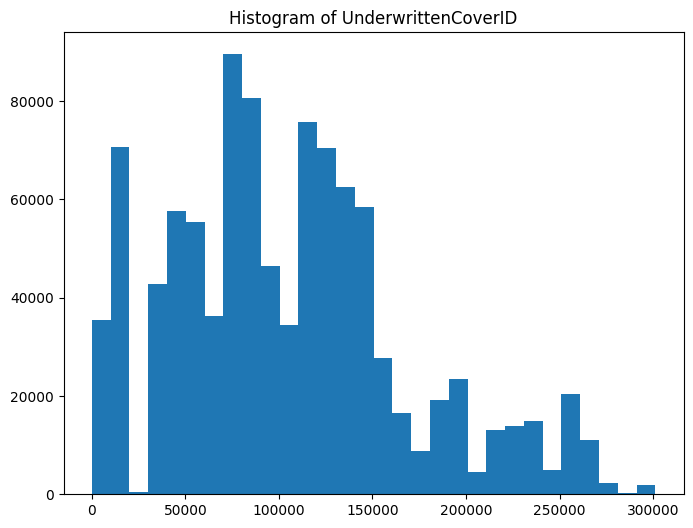

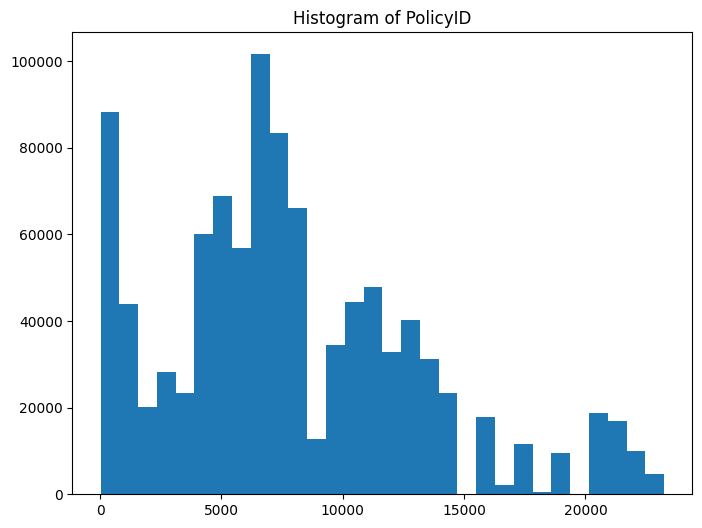

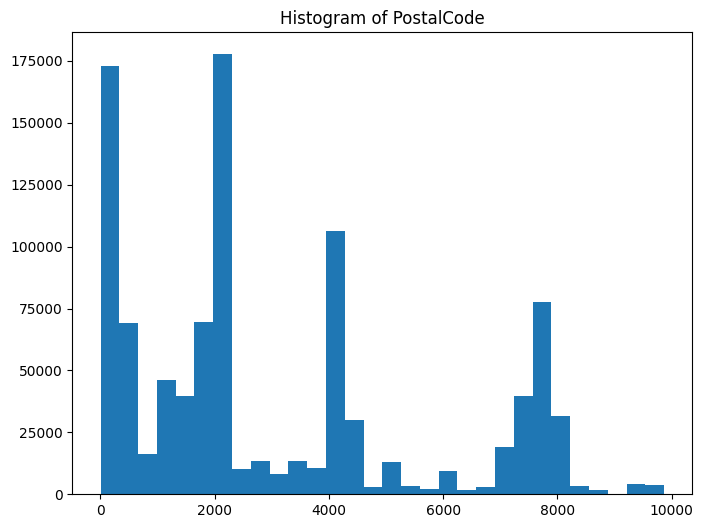

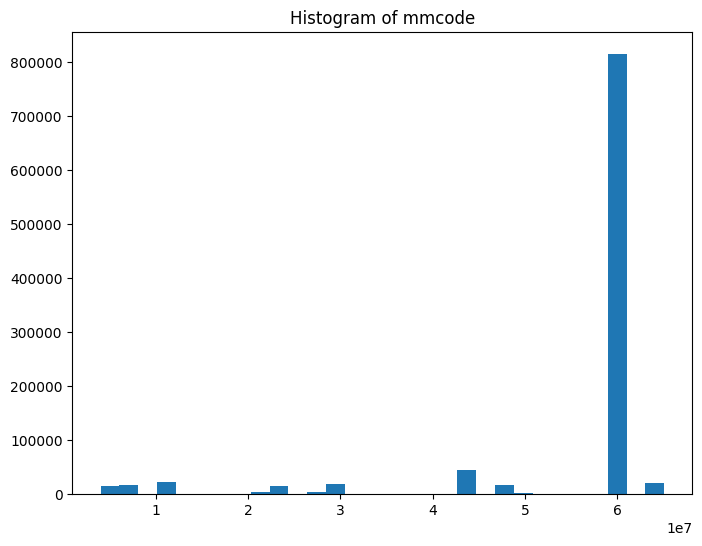

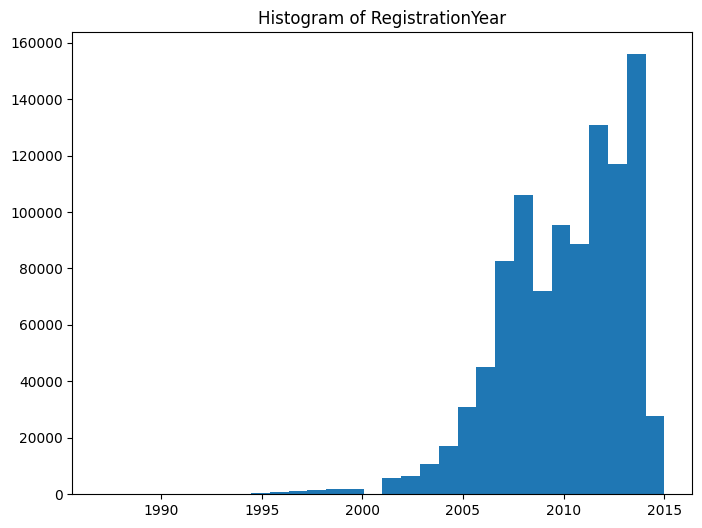

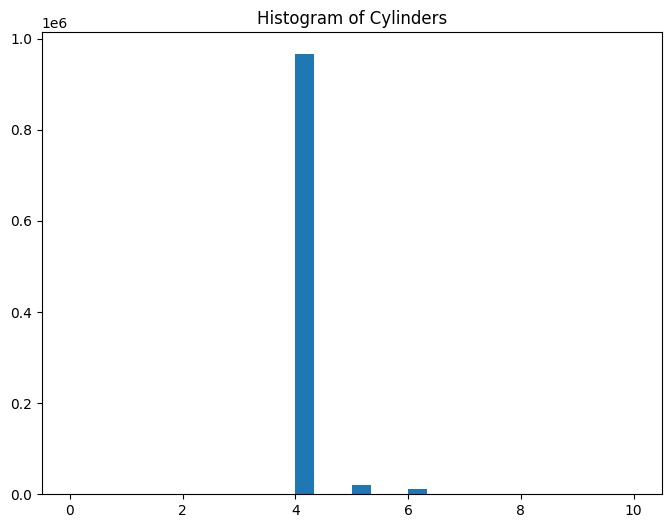

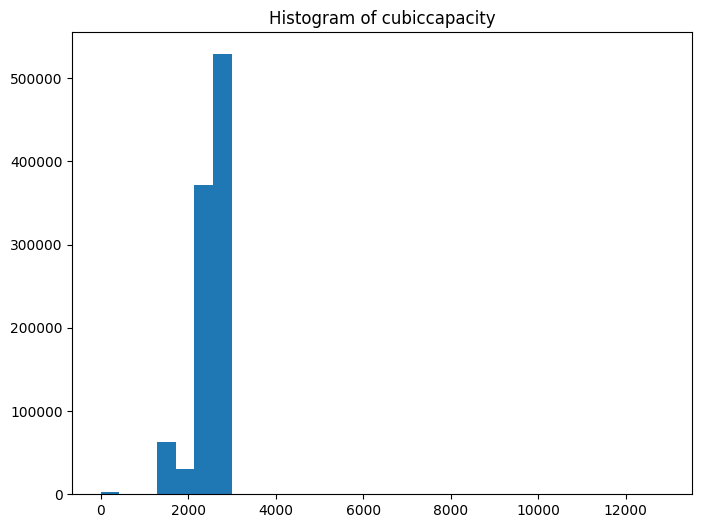

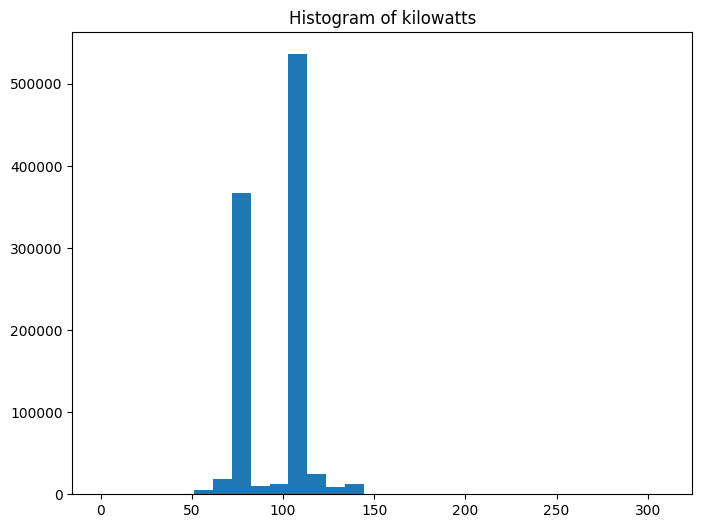

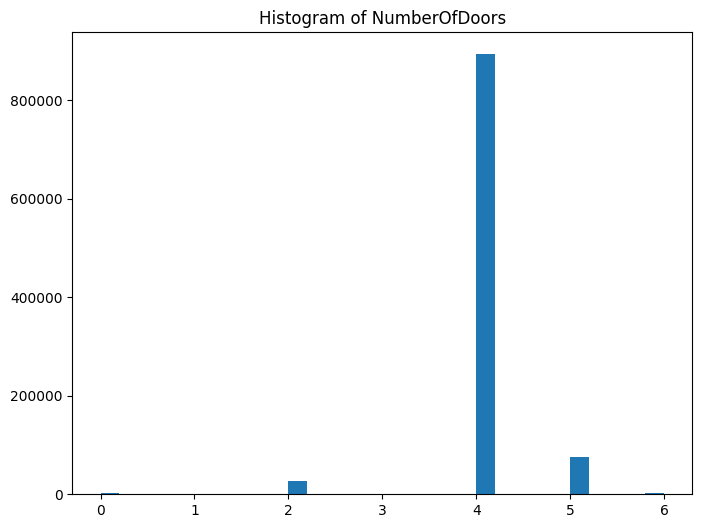

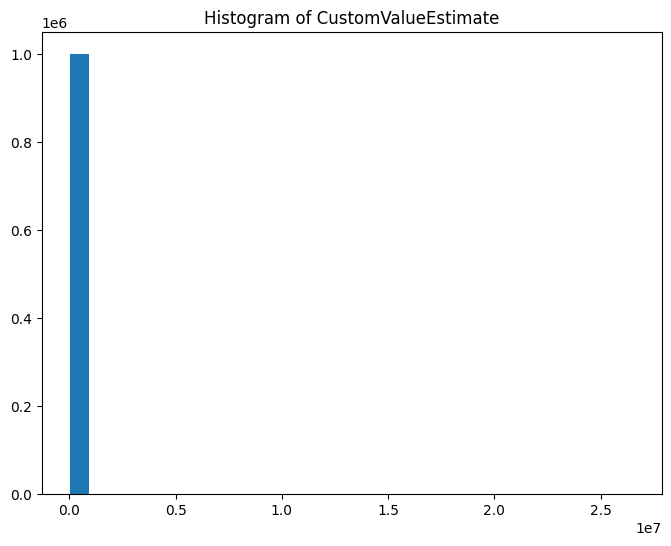

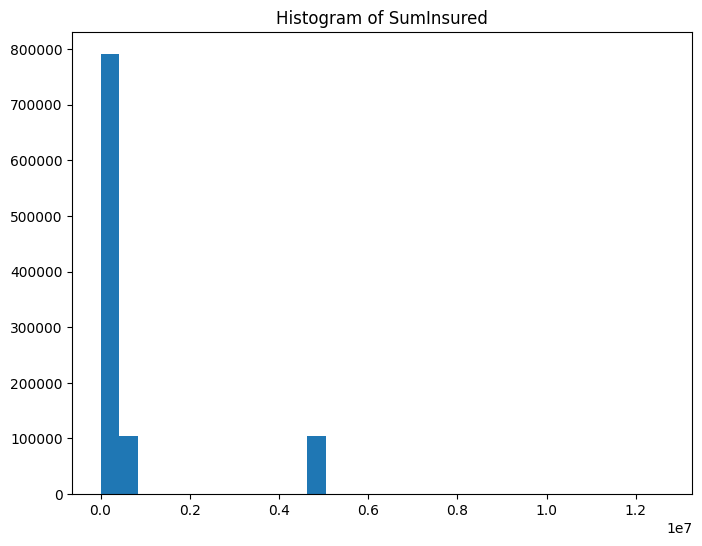

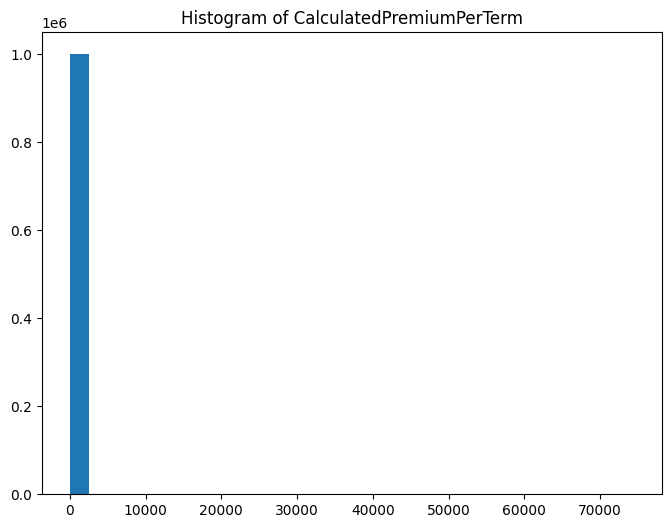

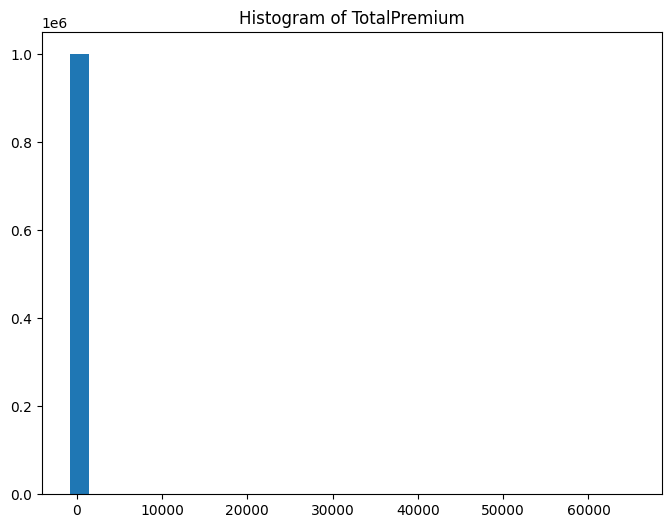

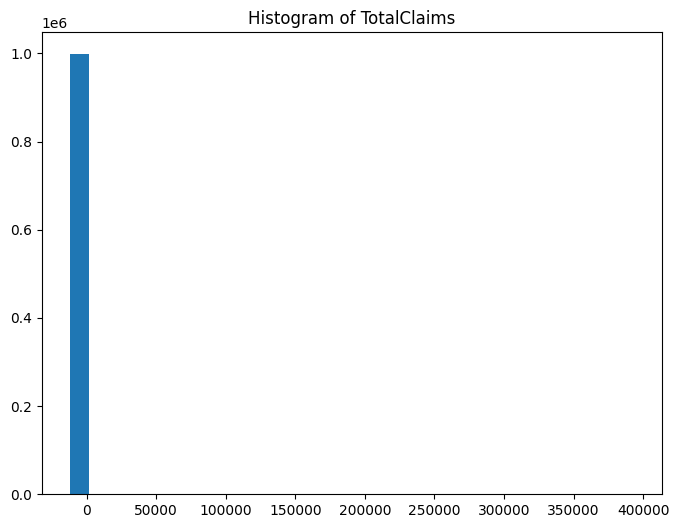

In [15]:
histogramPlotForNumericalColumns(insurance_data)

Bar charts for categorical

In [16]:
from scripts.Eda import barchartPlotForCategoricalColumns


In [17]:
# List of non-binary categorical columns (replace with your actual column names)
non_binary_categorical = [
    'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
    'MaritalStatus', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone',
    'ItemType', 'VehicleType', 'make', 'bodytype', 'TermFrequency',
    'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product',
    'StatutoryClass', 'StatutoryRiskType'
]

insurance_data[non_binary_categorical] = insurance_data[non_binary_categorical].astype('category')

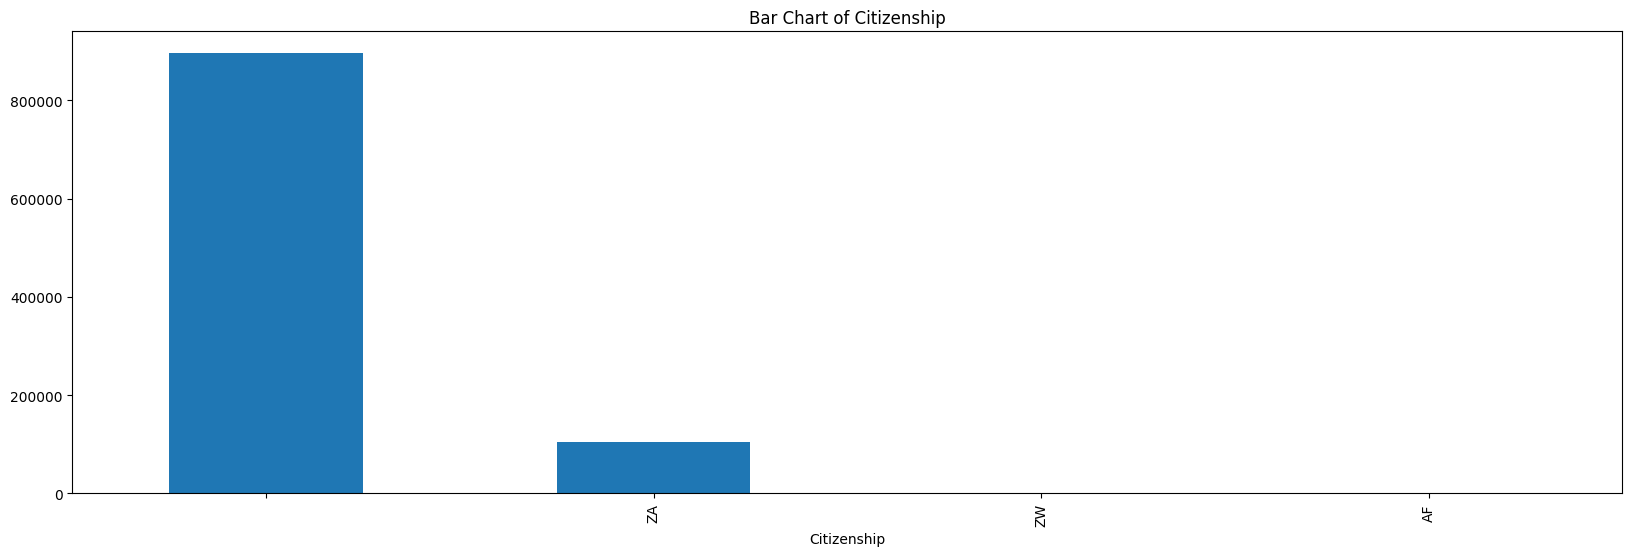

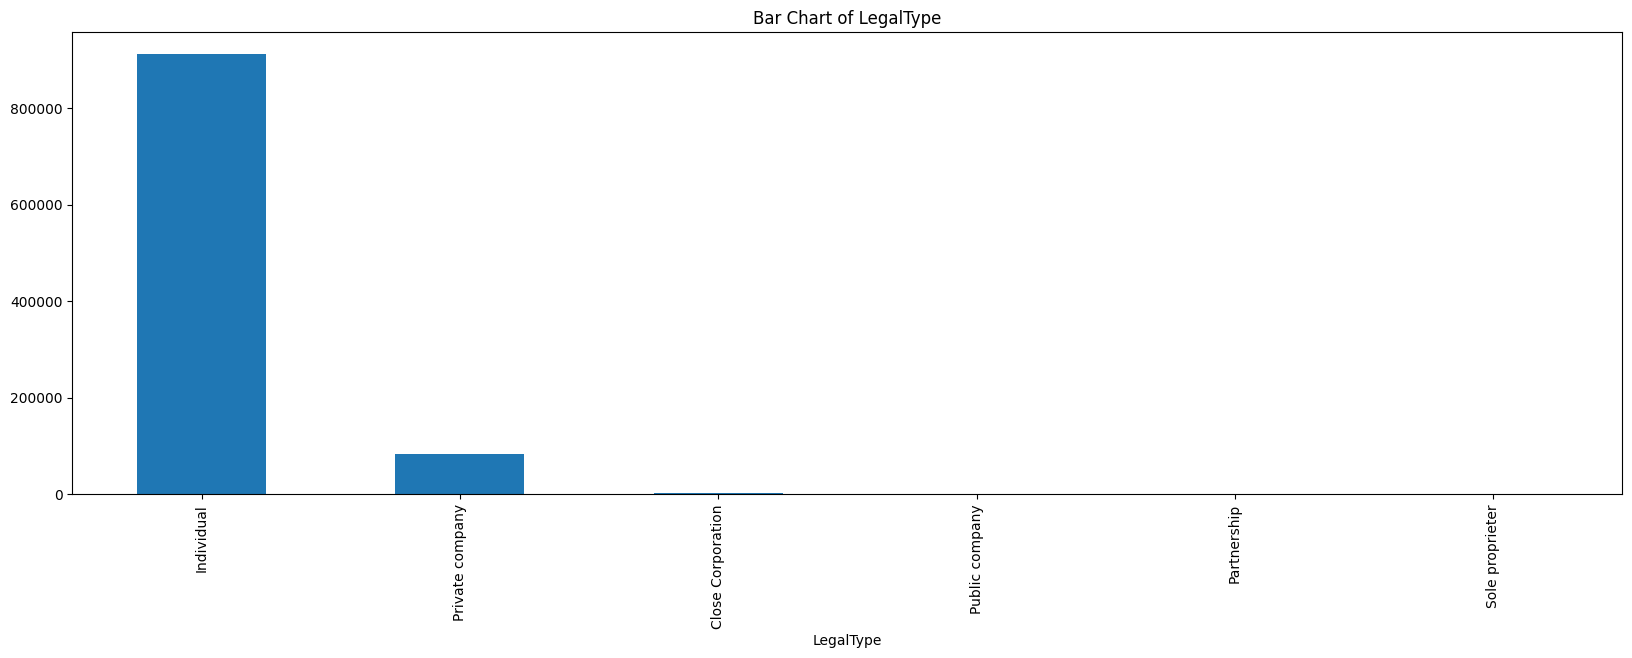

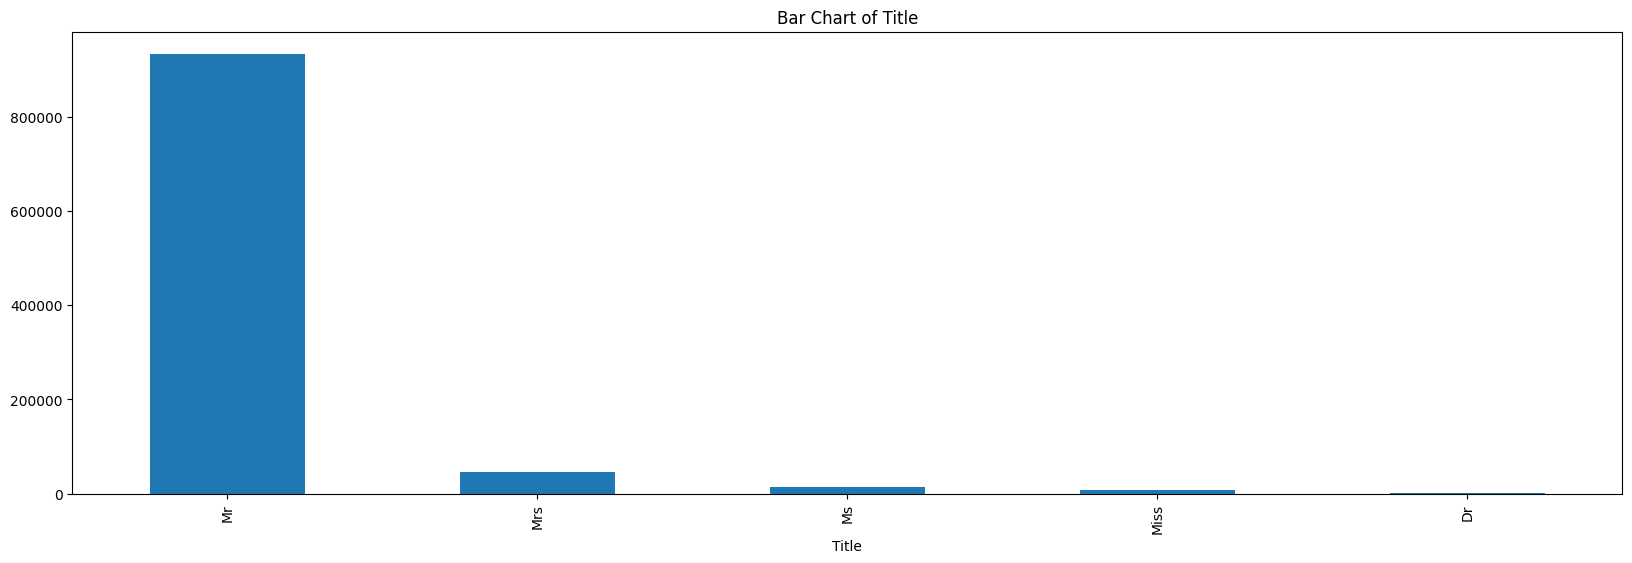

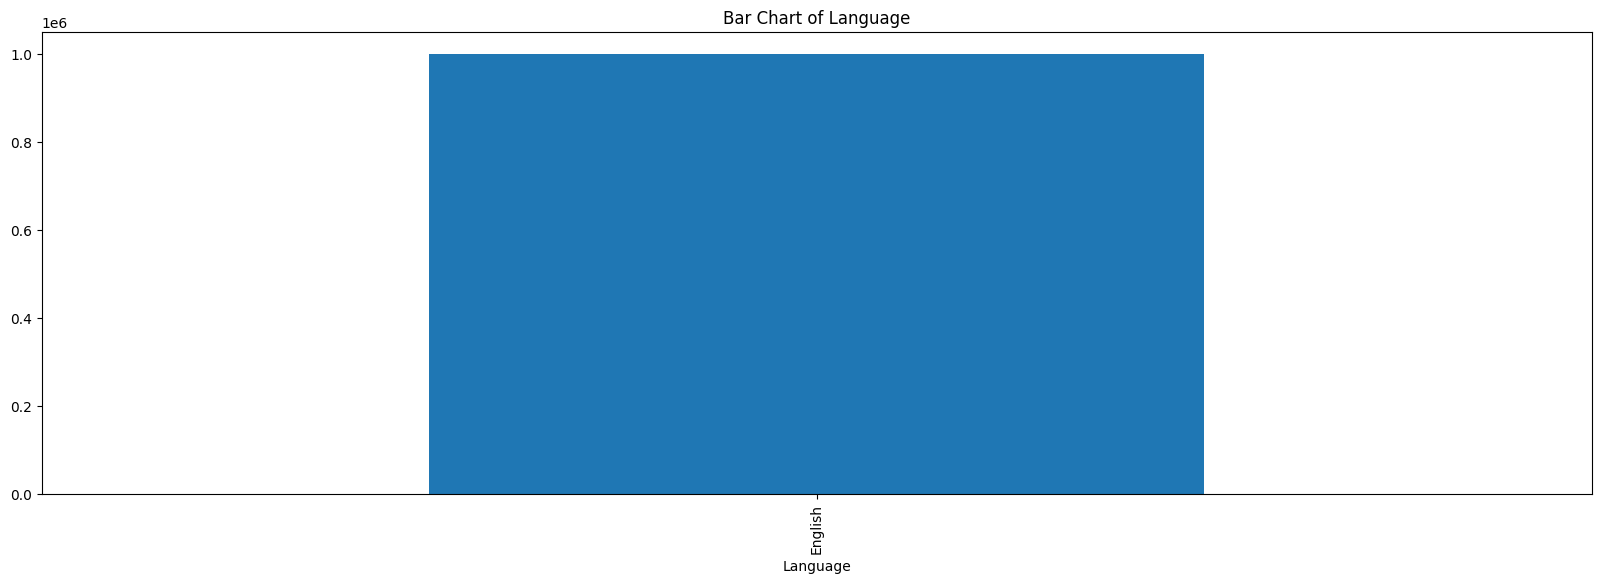

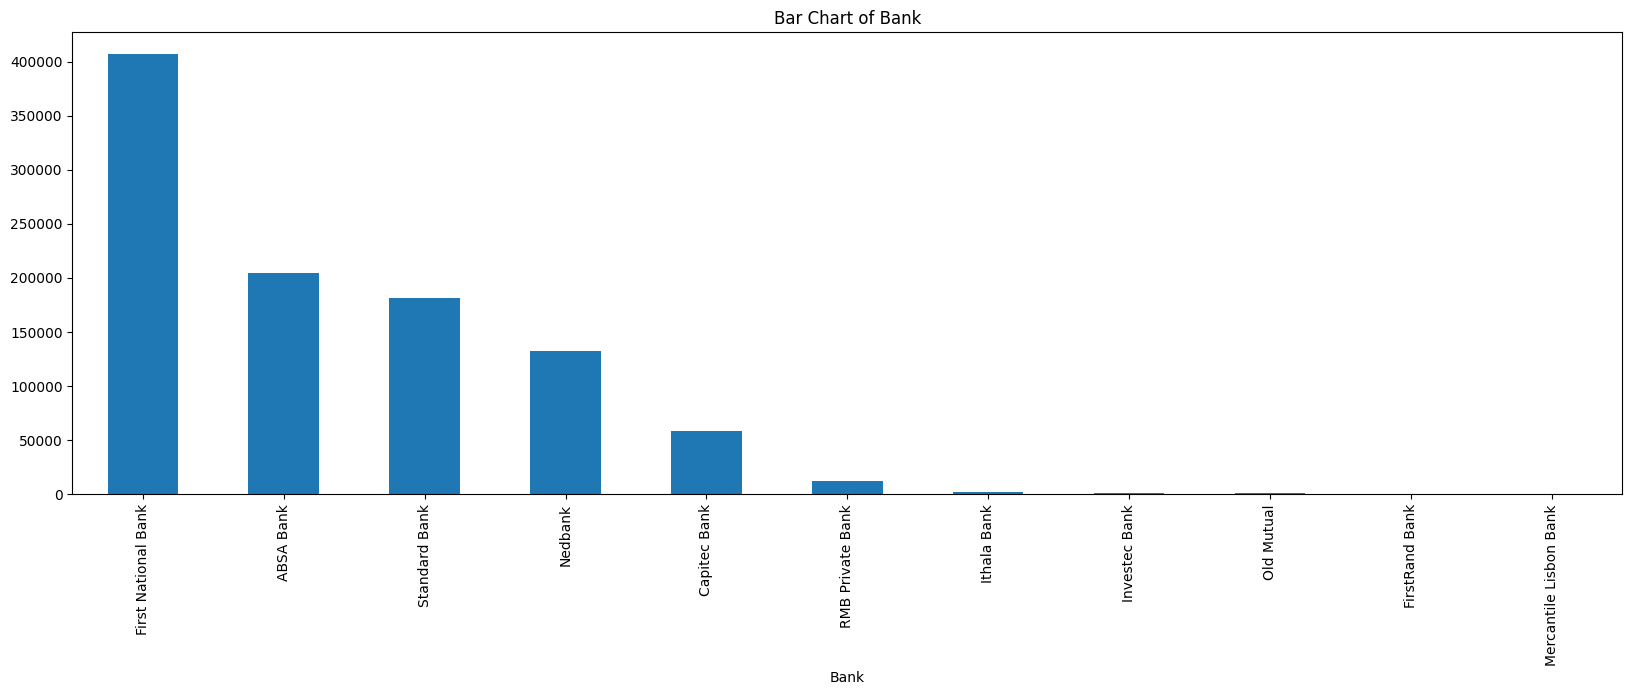

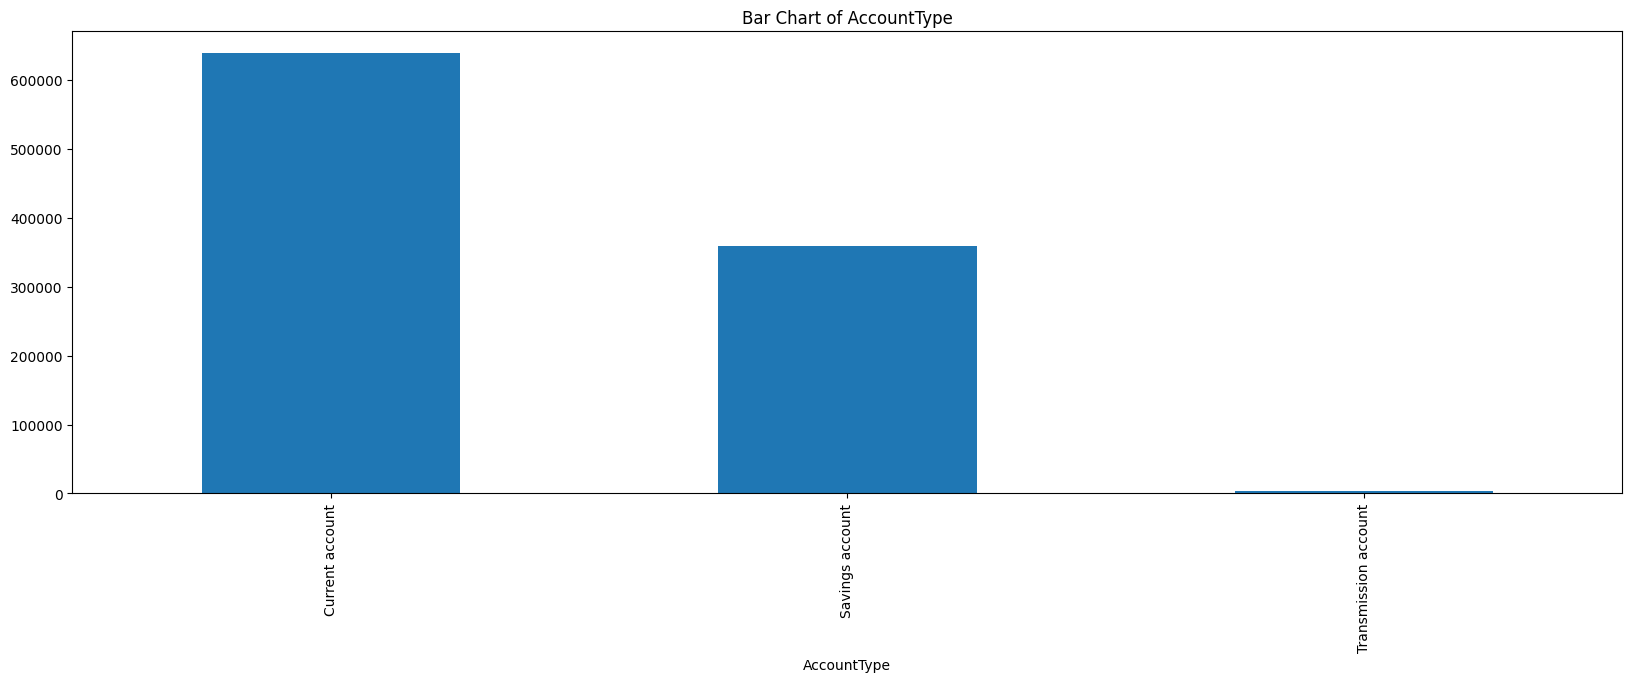

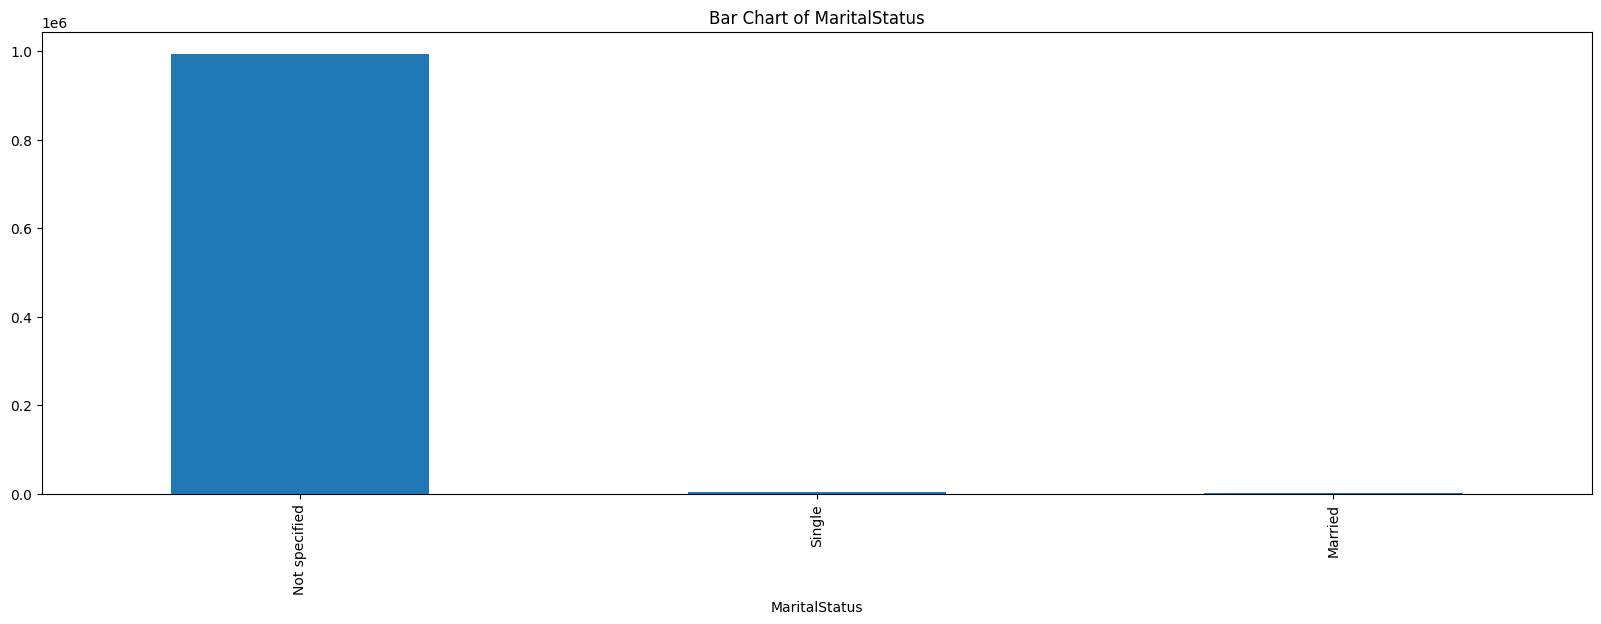

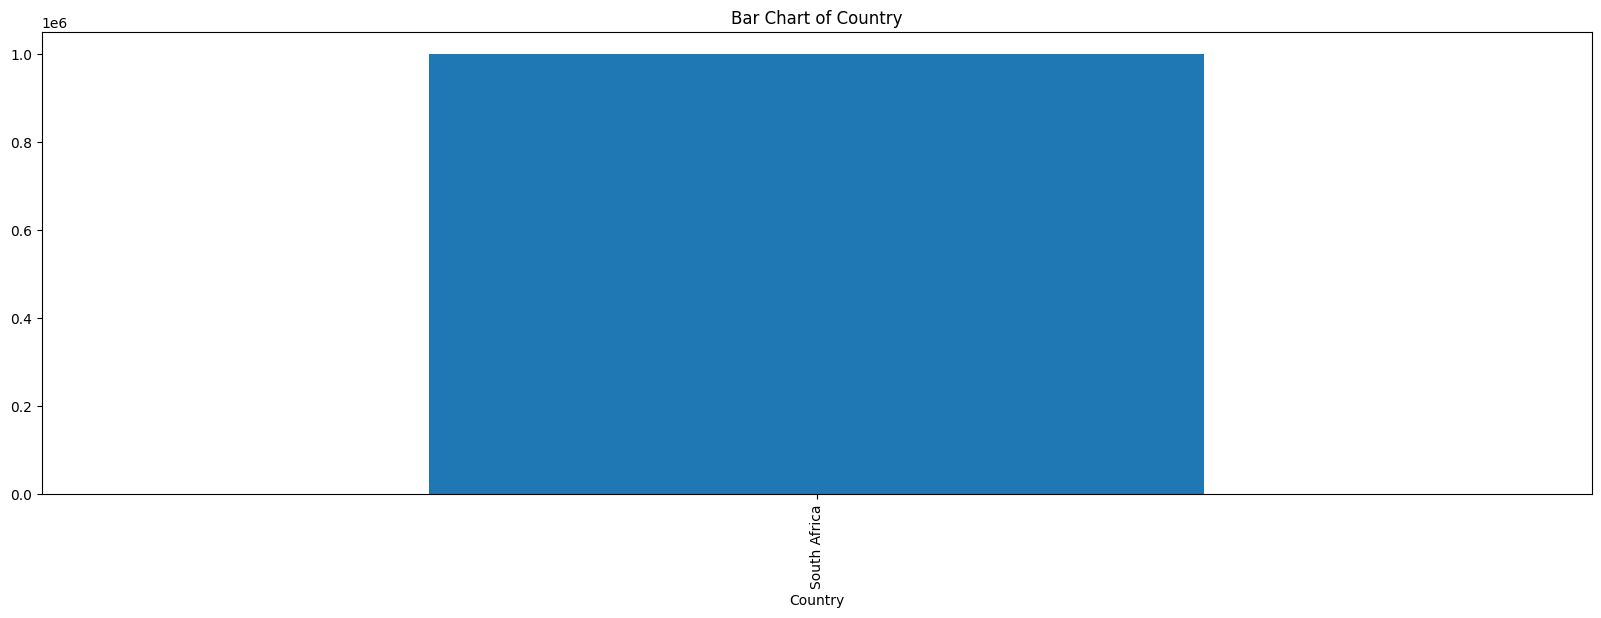

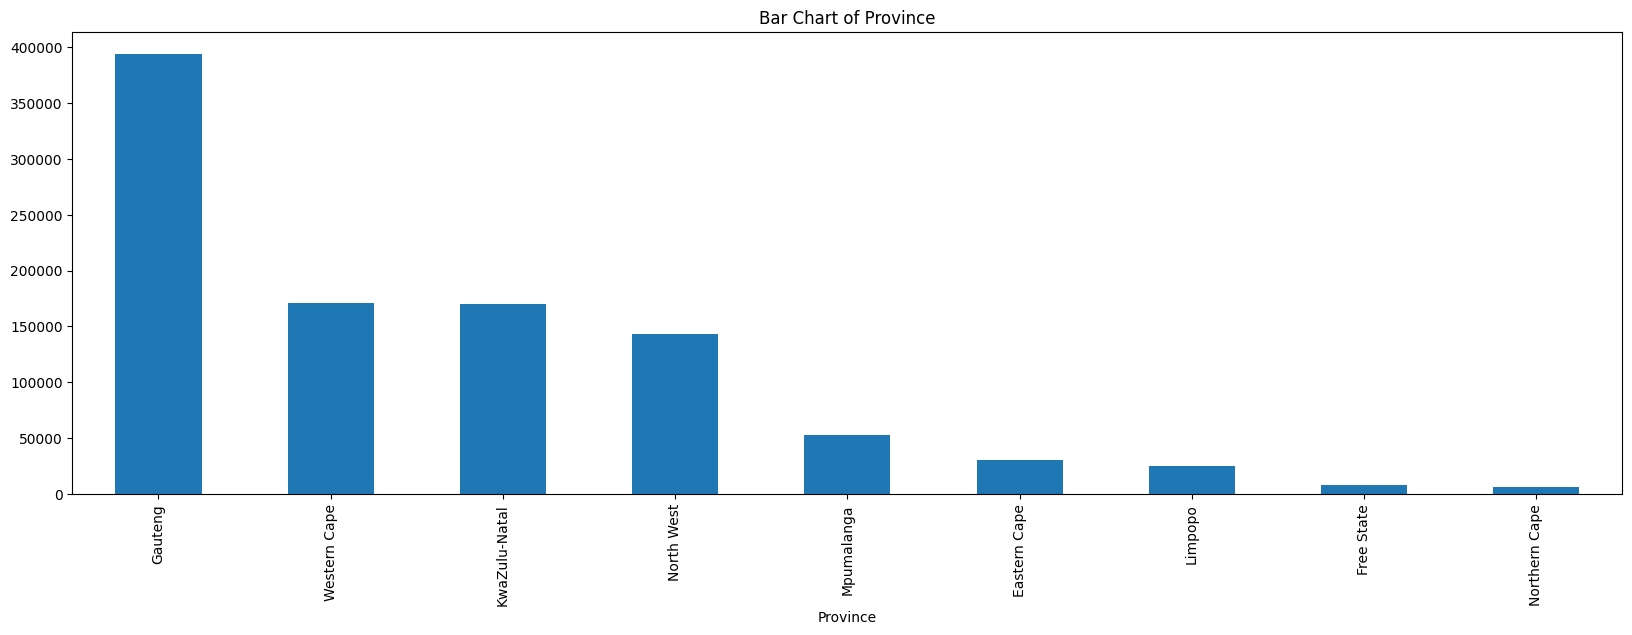

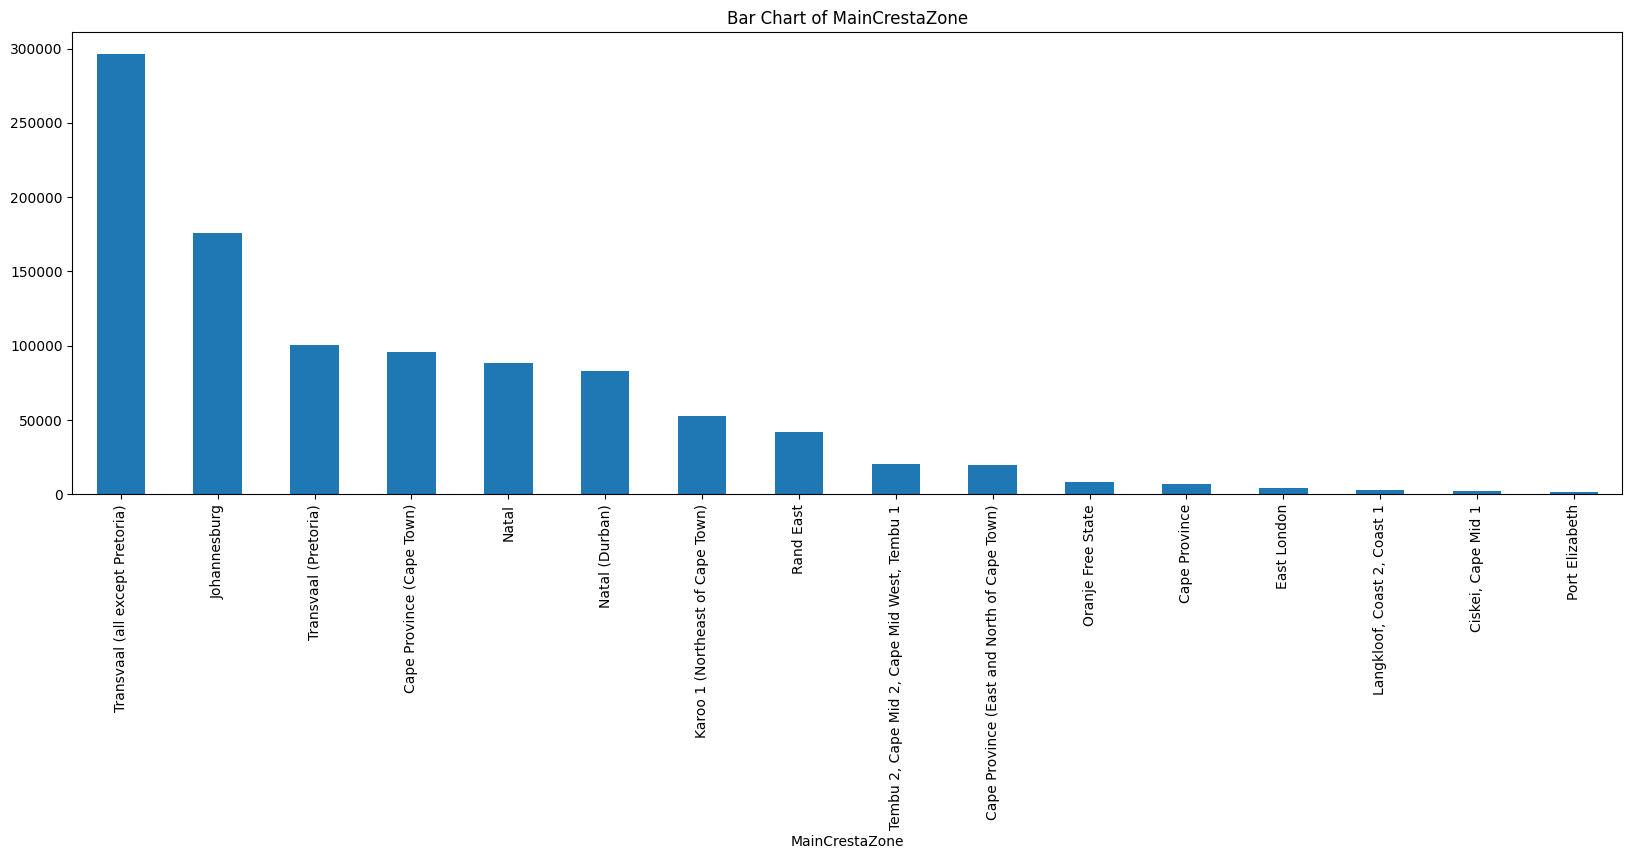

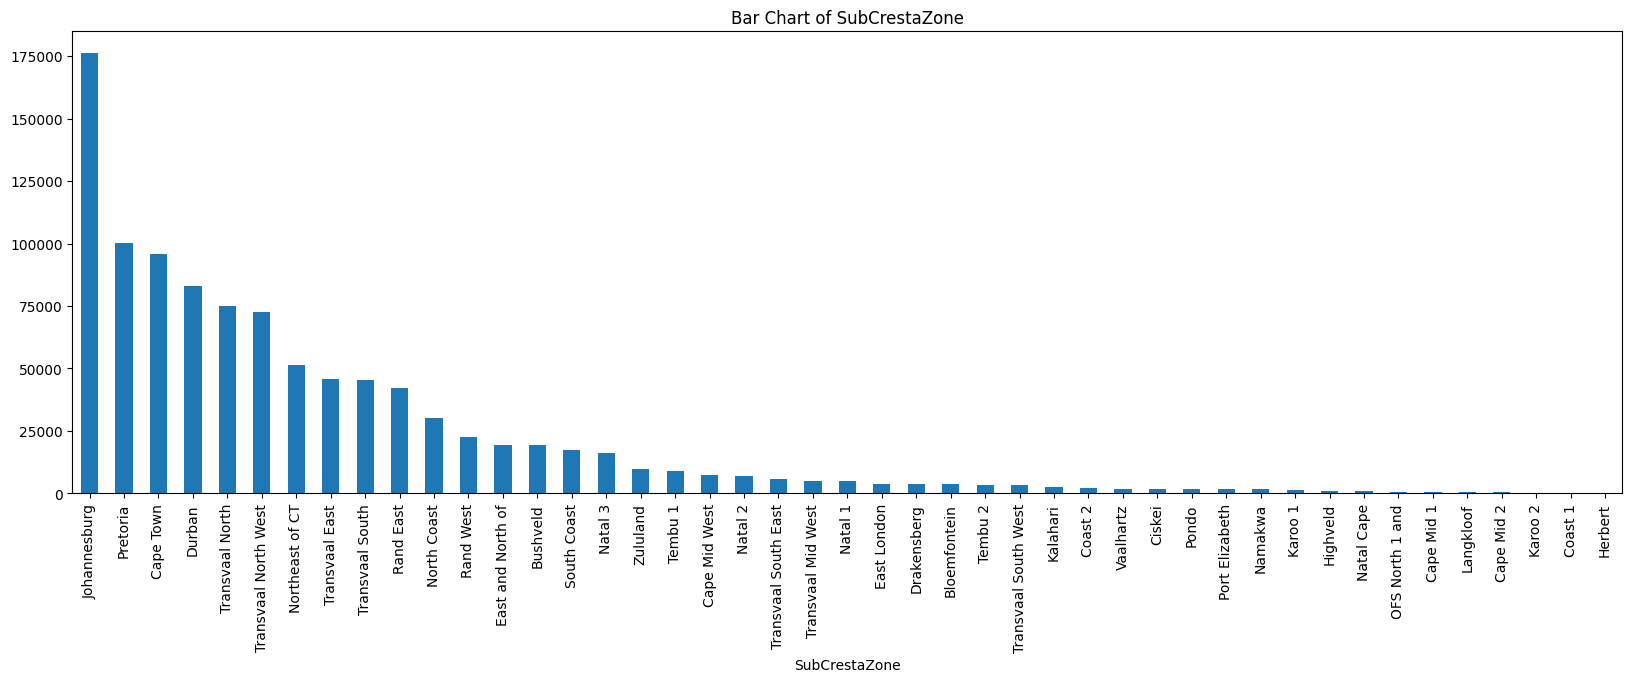

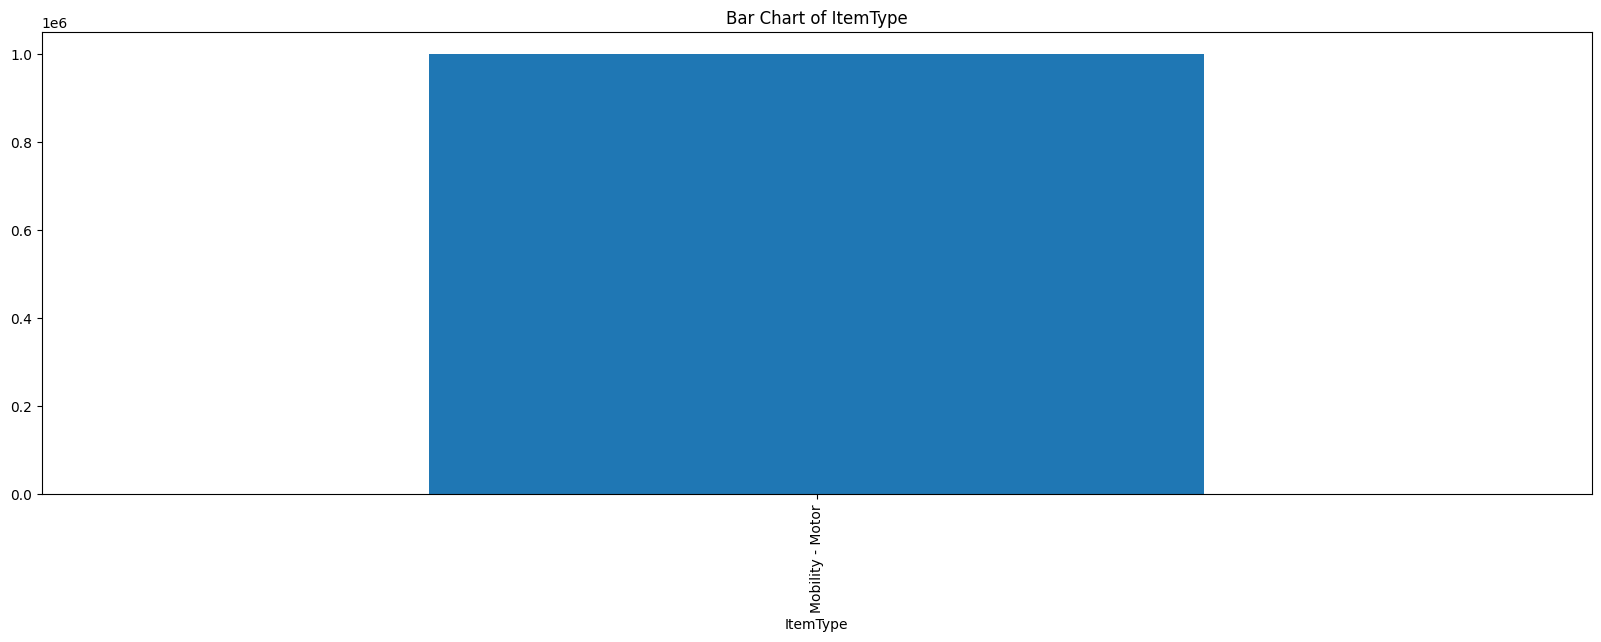

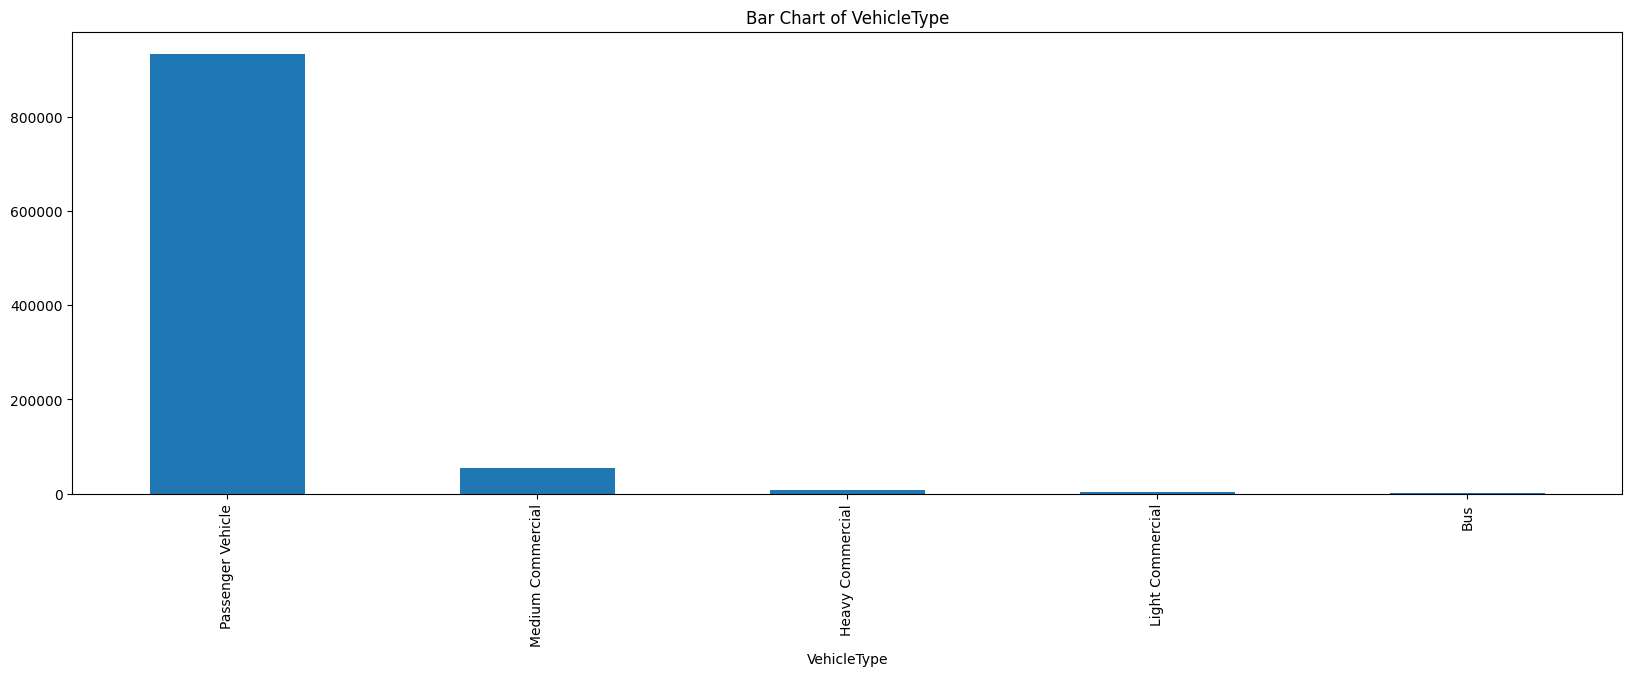

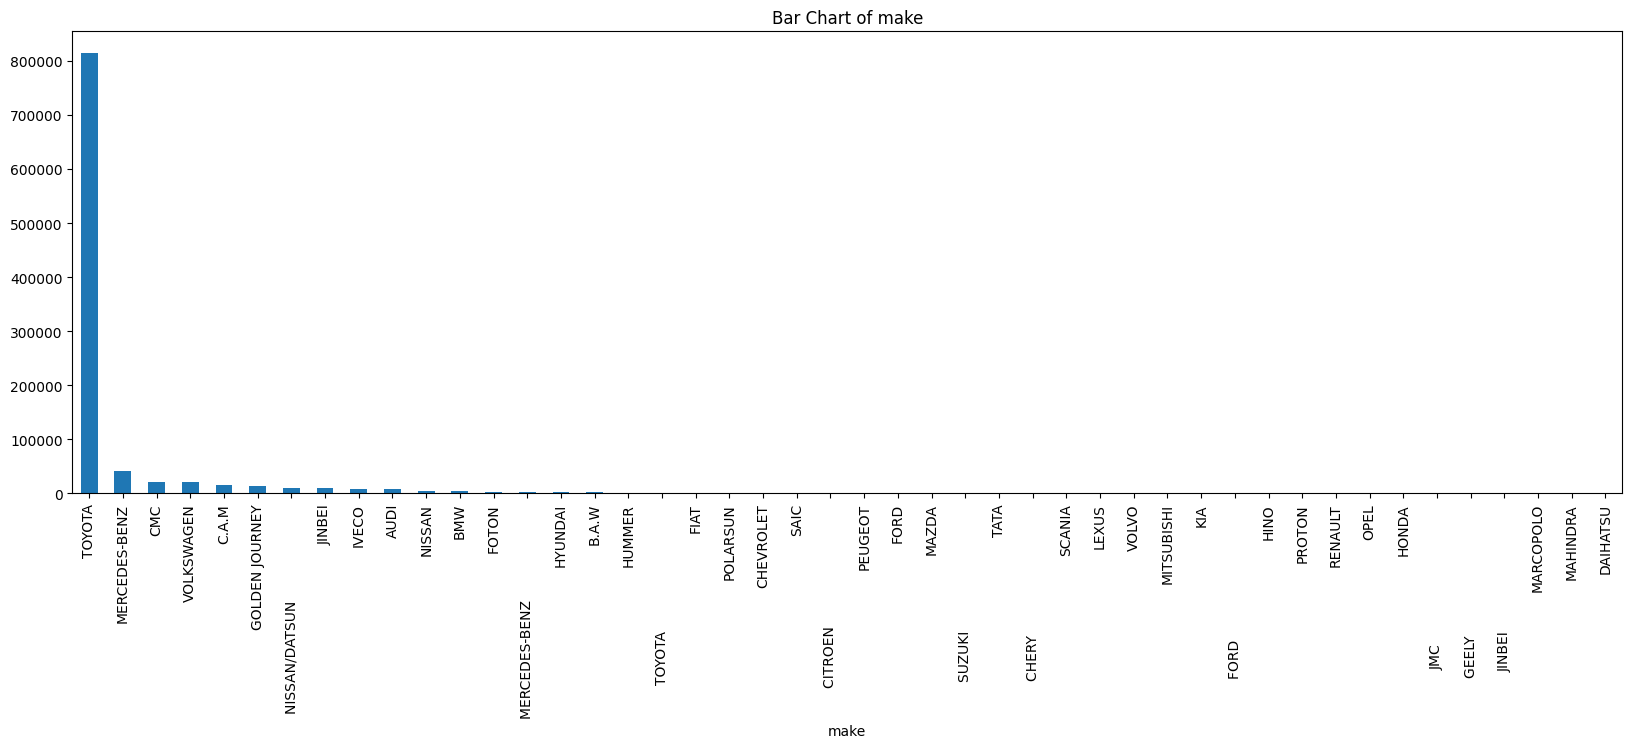

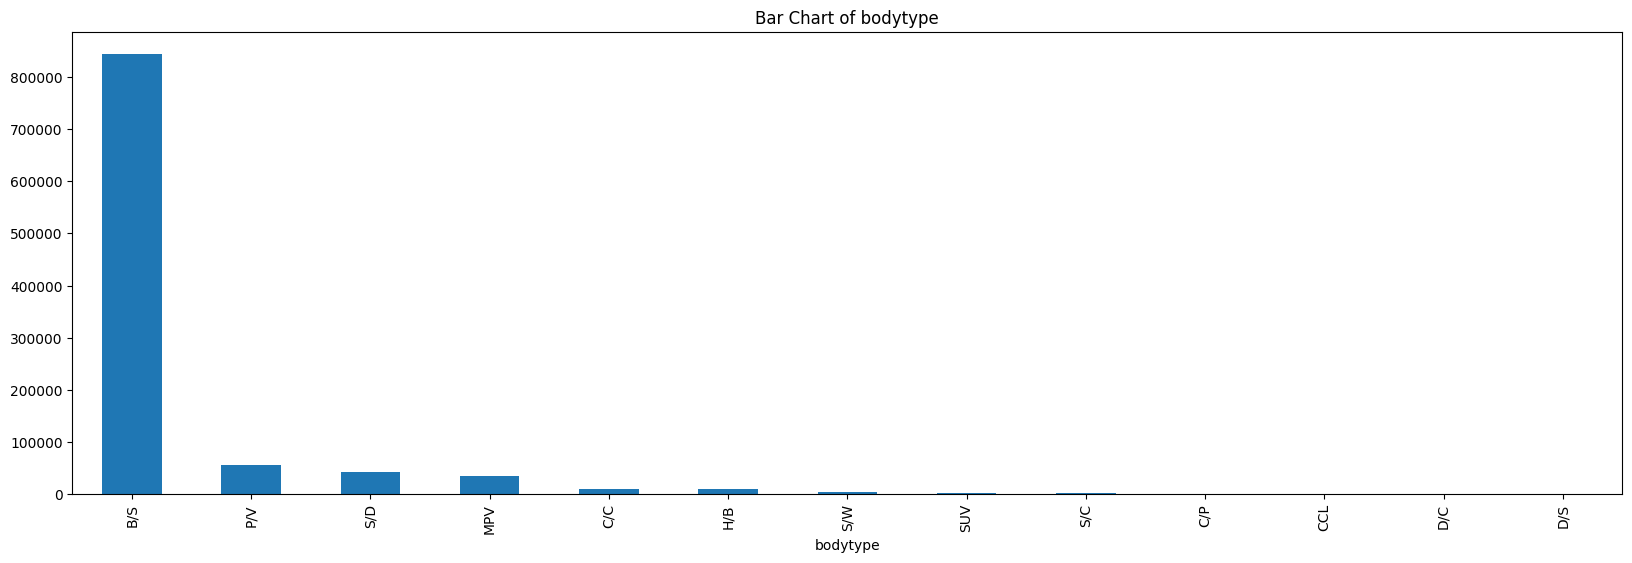

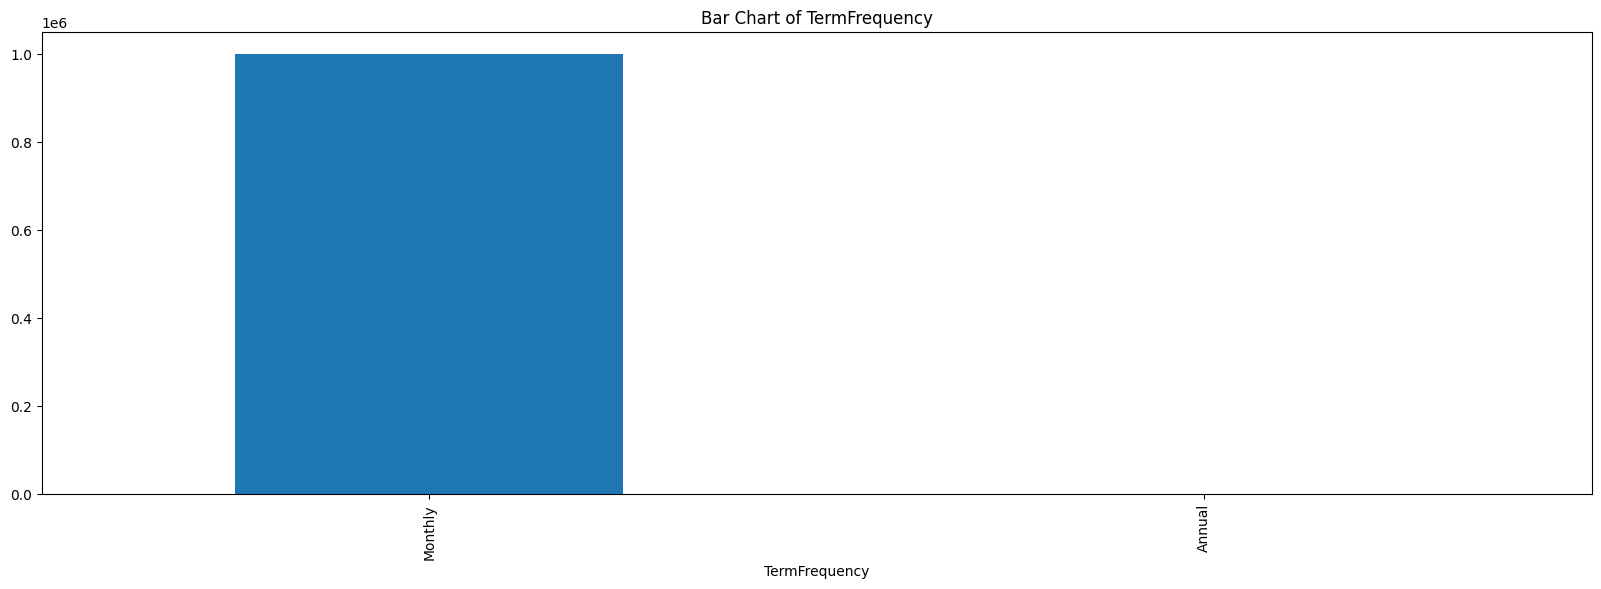

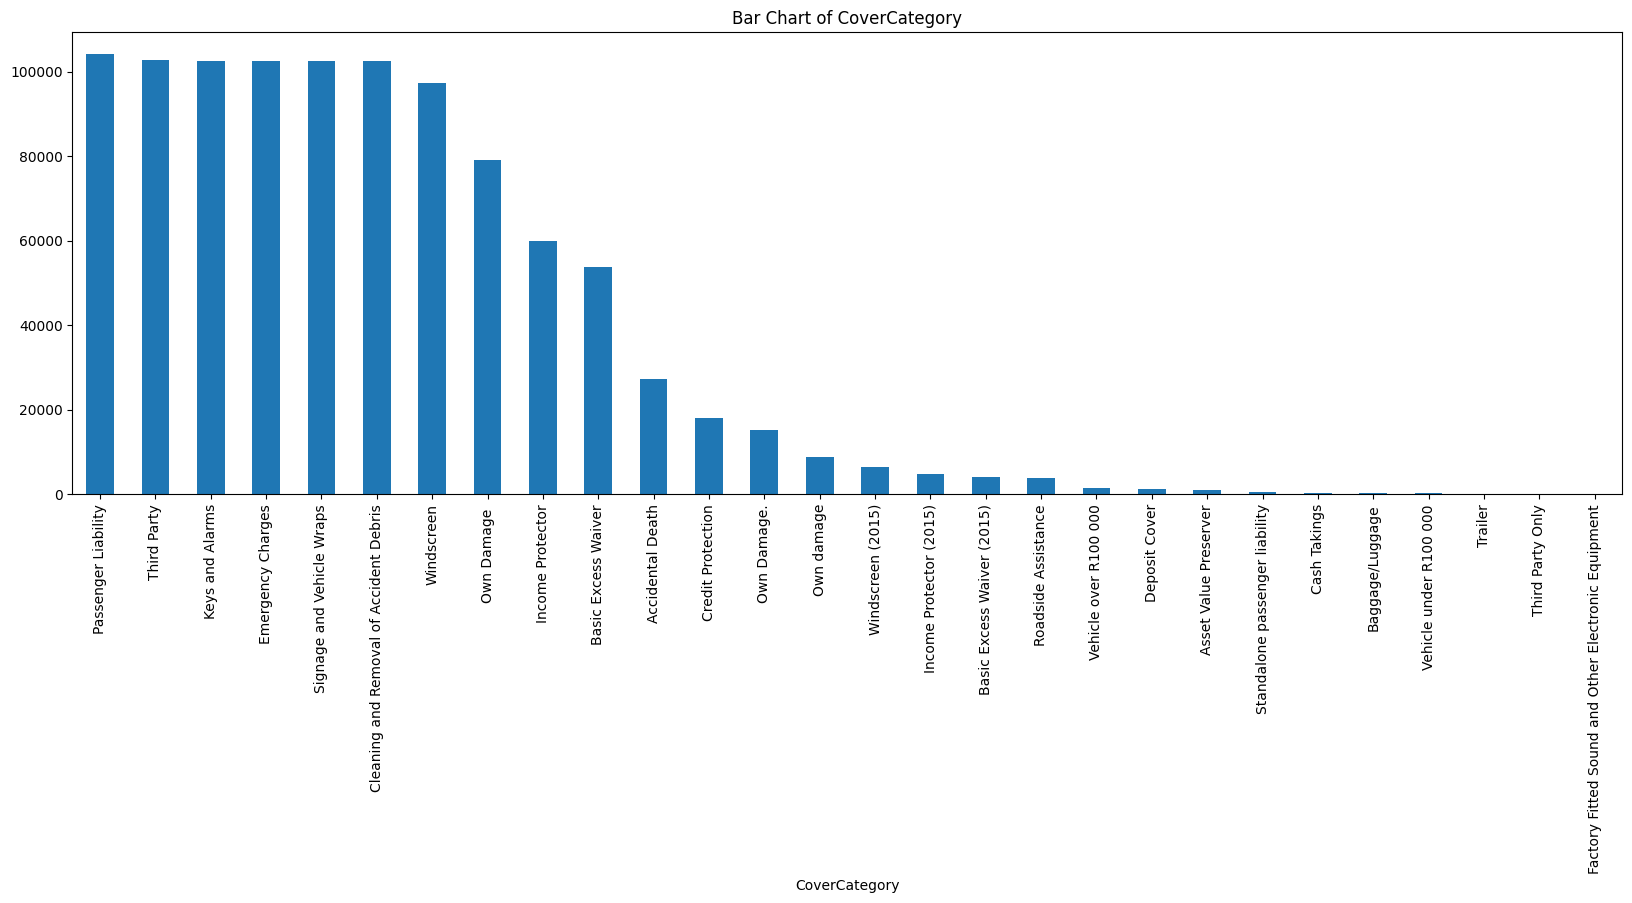

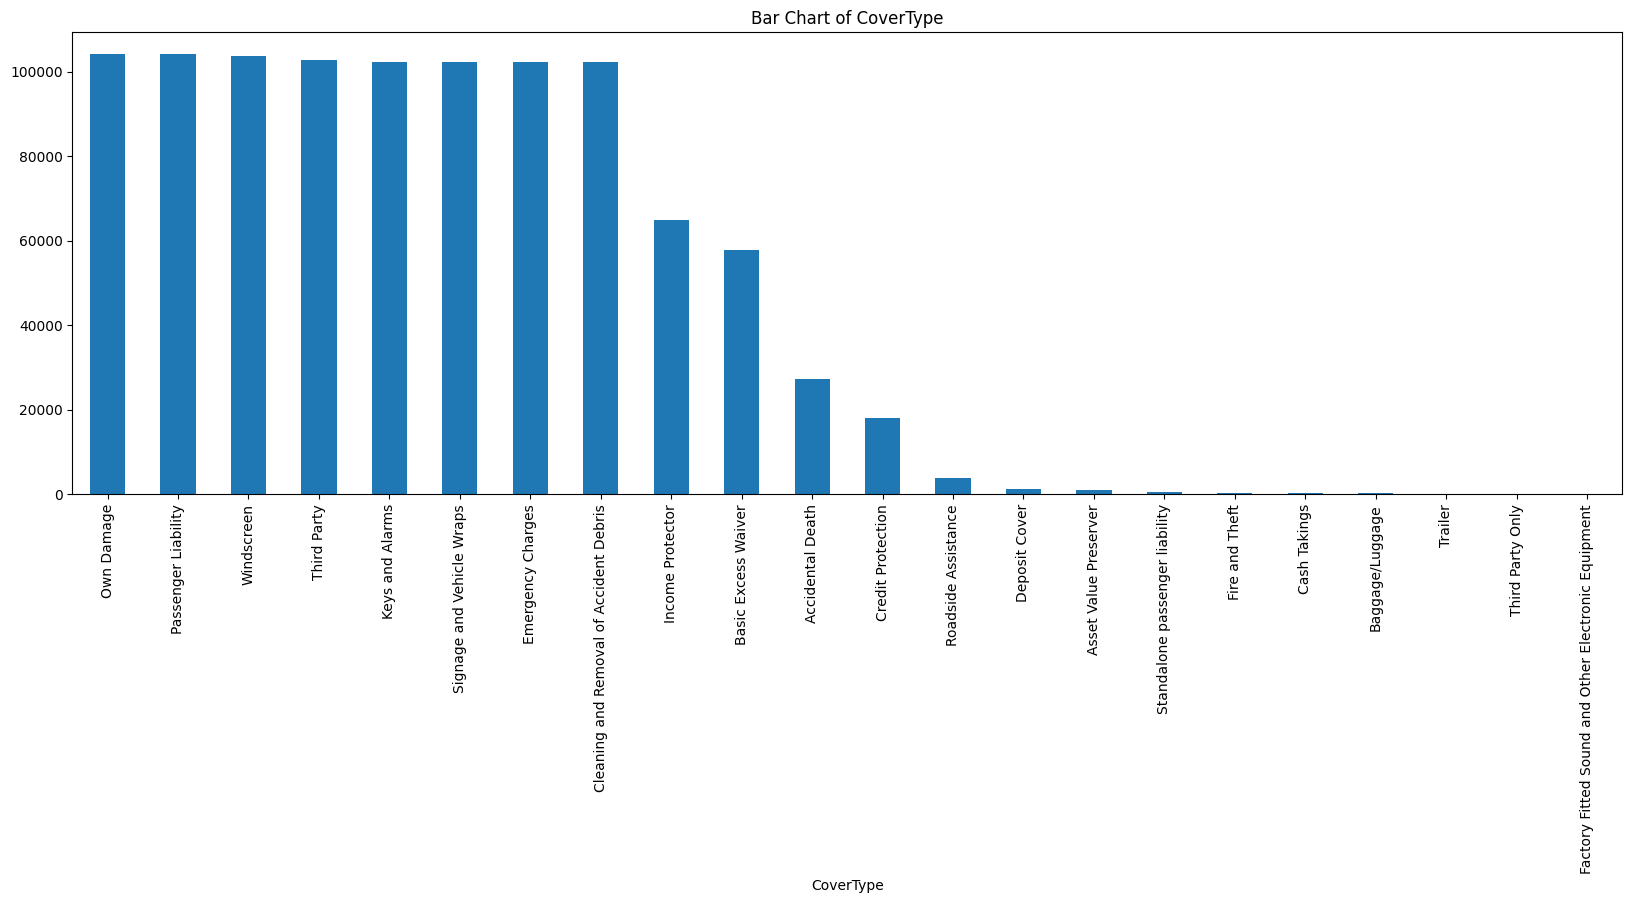

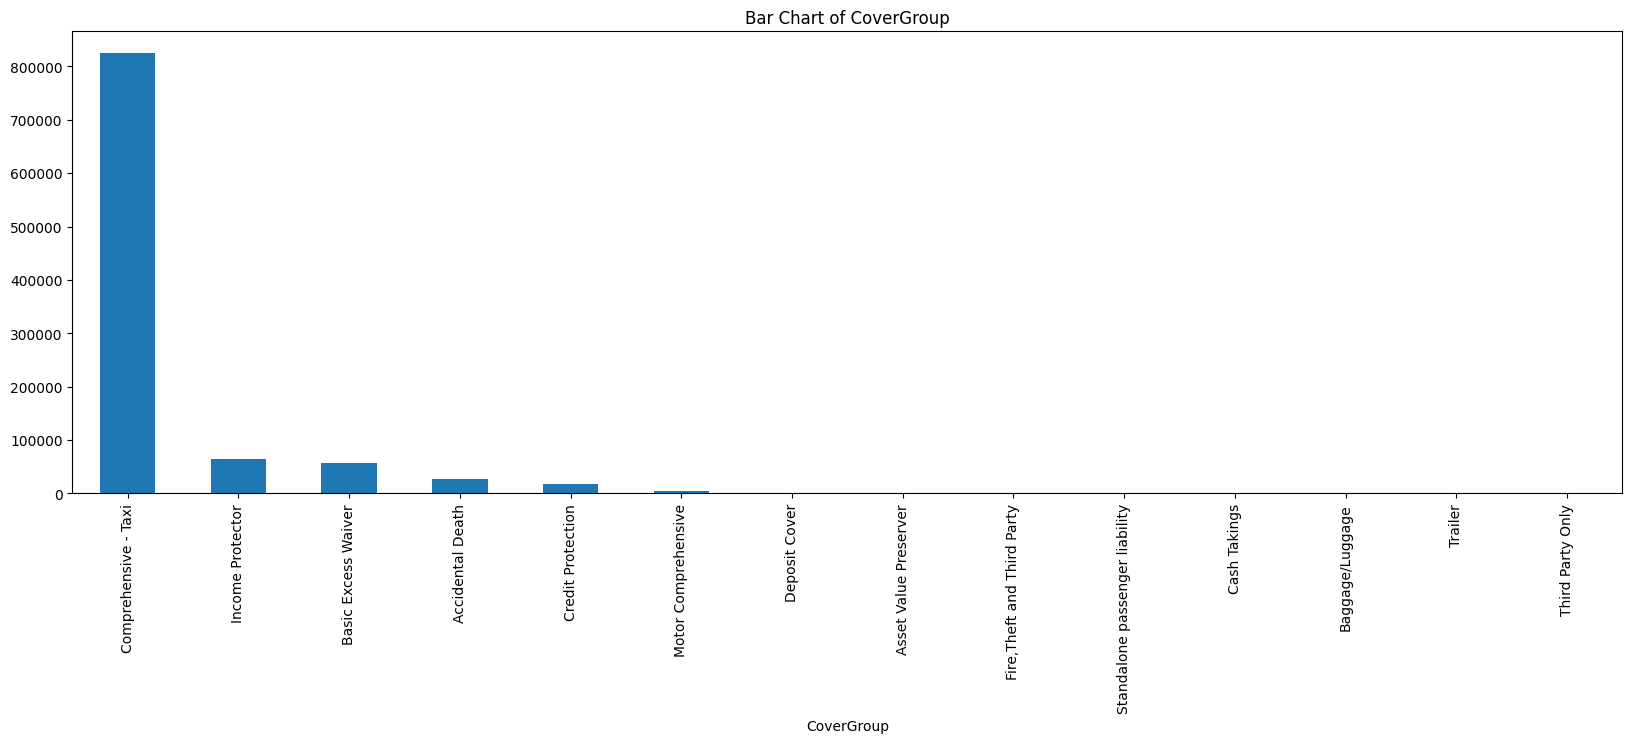

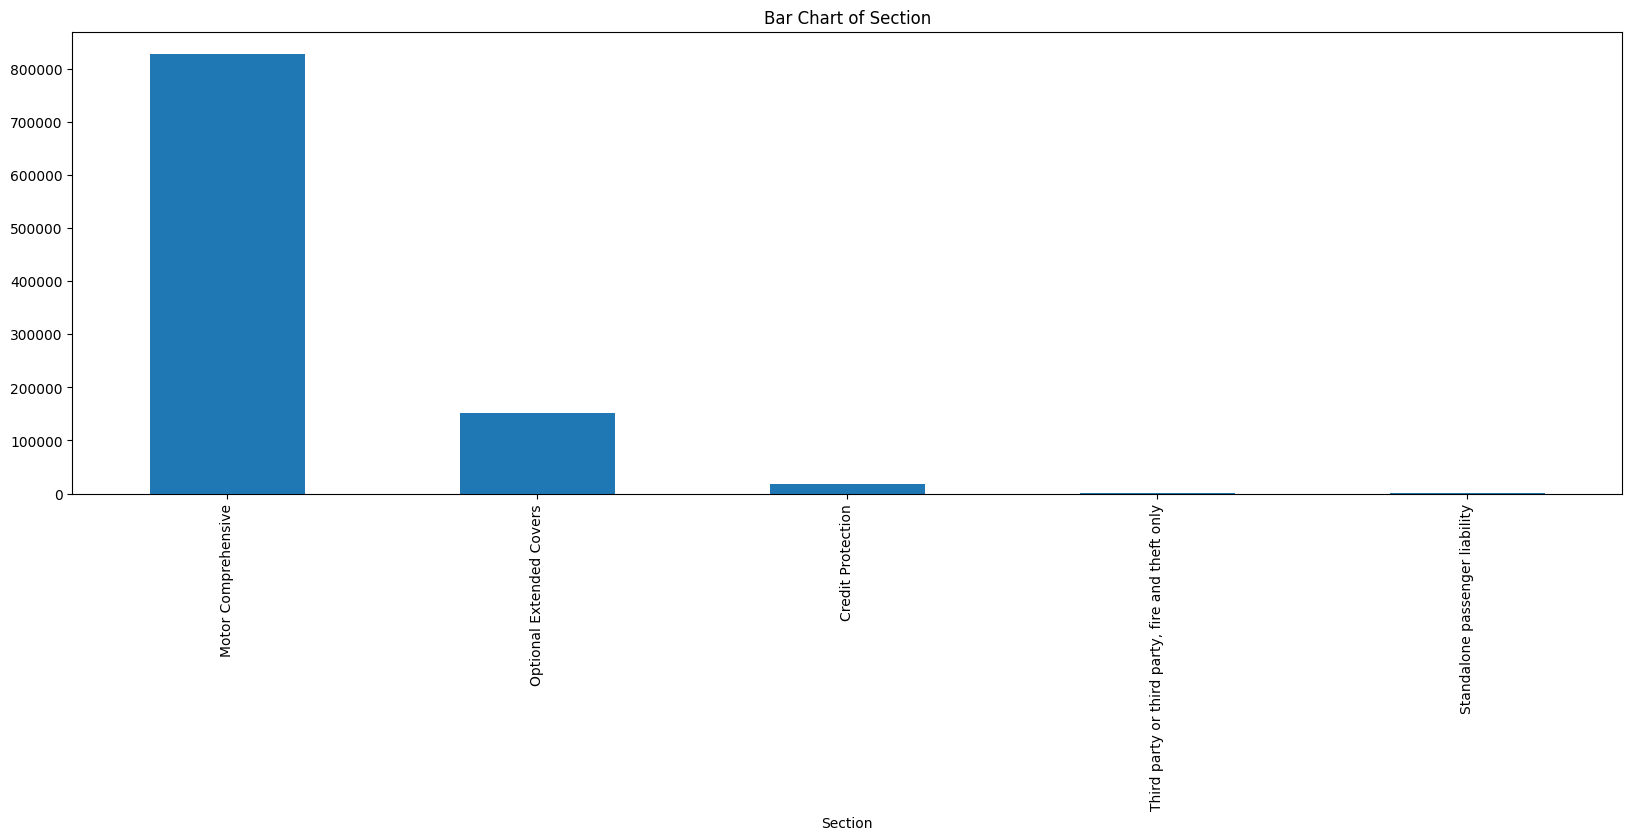

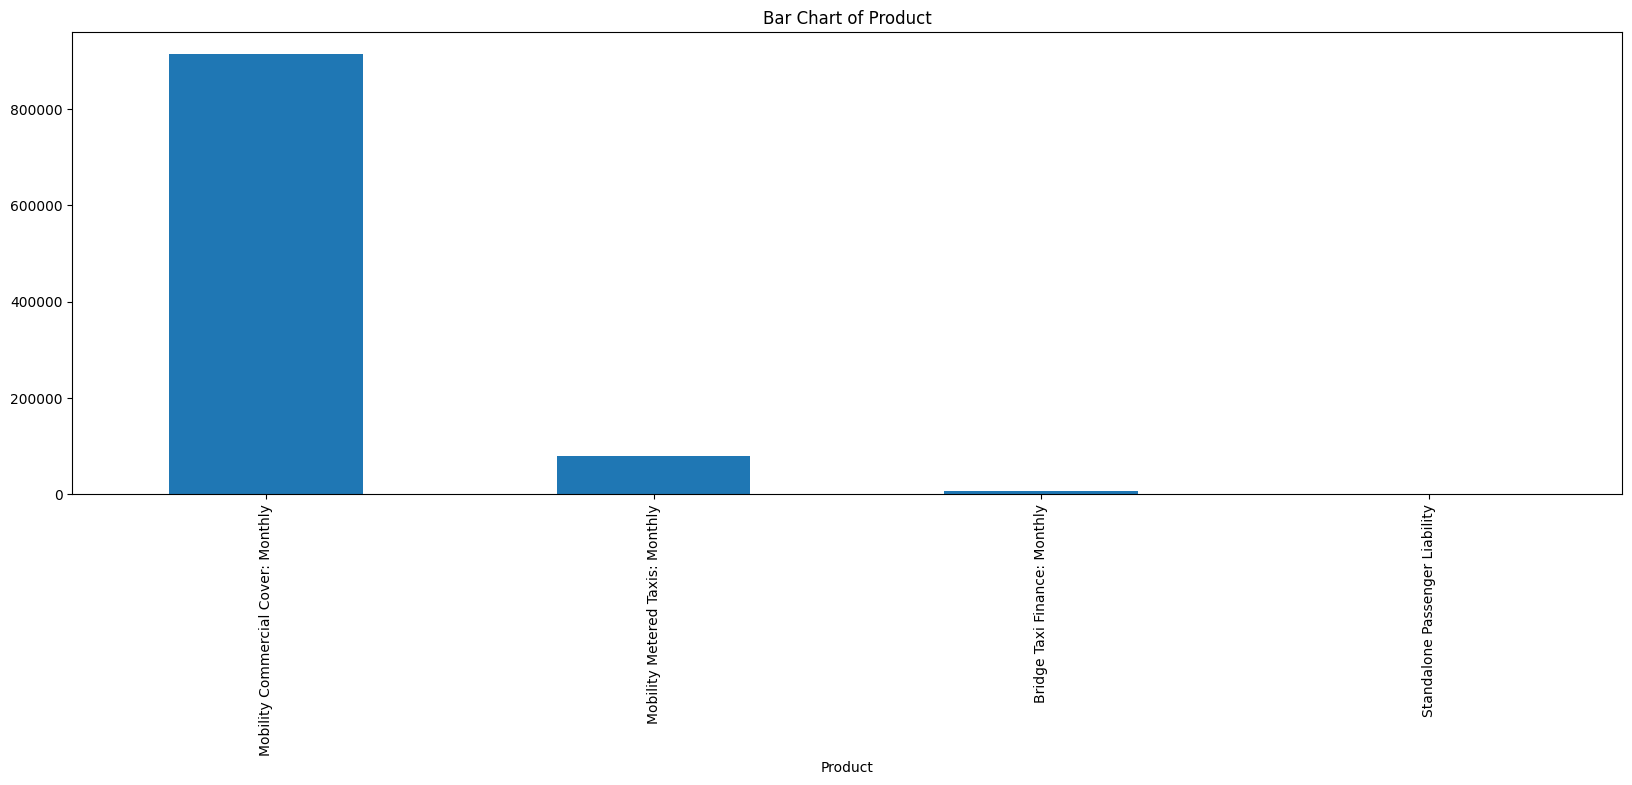

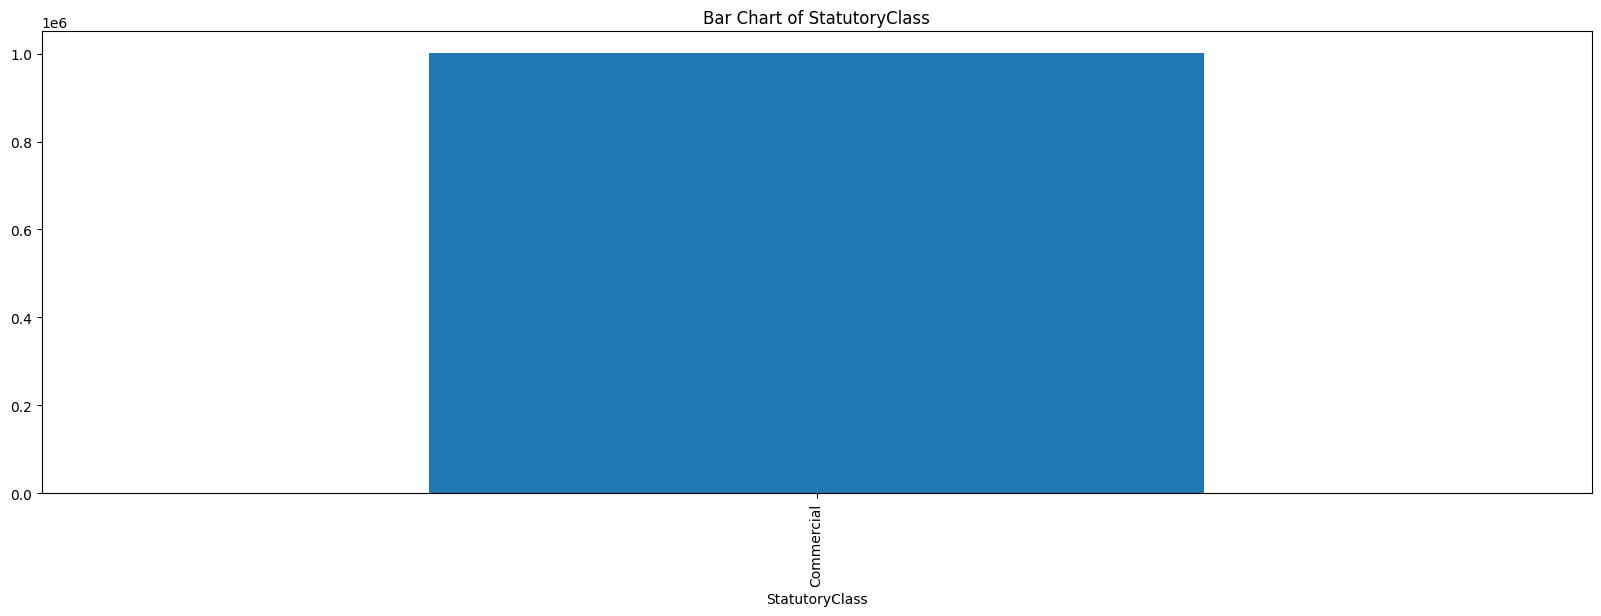

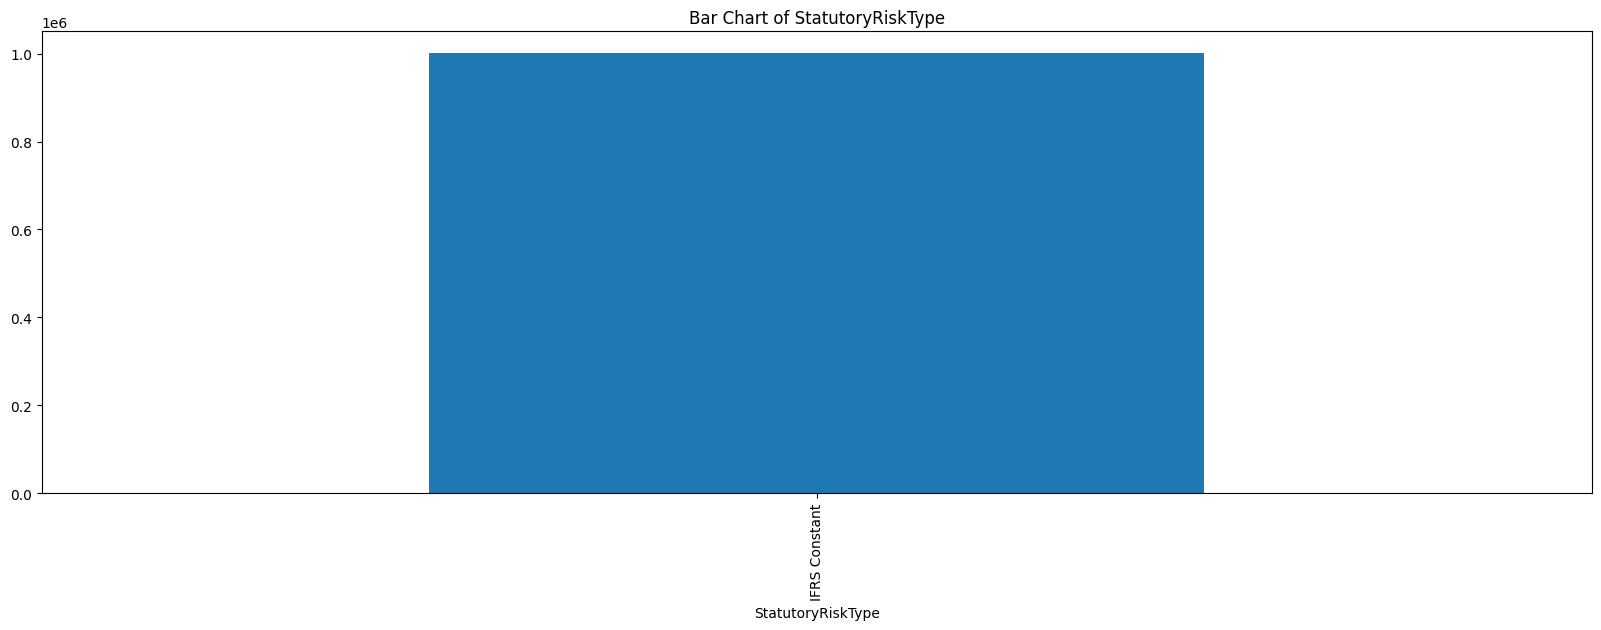

In [18]:
barchartPlotForCategoricalColumns(insurance_data)

Bivariate Analysis

Using correlation

In [19]:
insurance_data['TransactionMonth'] = pd.to_datetime(insurance_data['TransactionMonth'])
grouped_data = insurance_data.groupby(['TransactionMonth','PostalCode'])[['TotalPremium','TotalClaims']].mean().reset_index()


<Axes: >

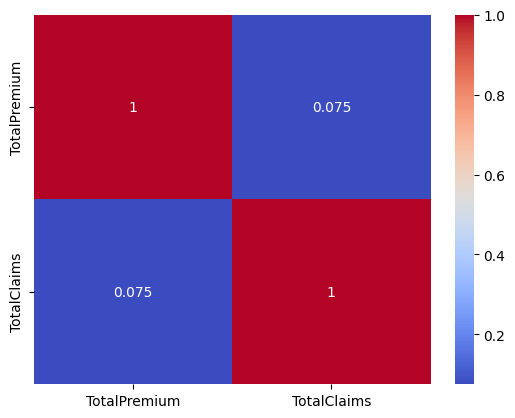

In [20]:
correlation_data = grouped_data[['TotalPremium','TotalClaims']].corr()
sns.heatmap(correlation_data,annot=True,cmap='coolwarm')

<Axes: xlabel='TotalPremium', ylabel='TotalClaims'>

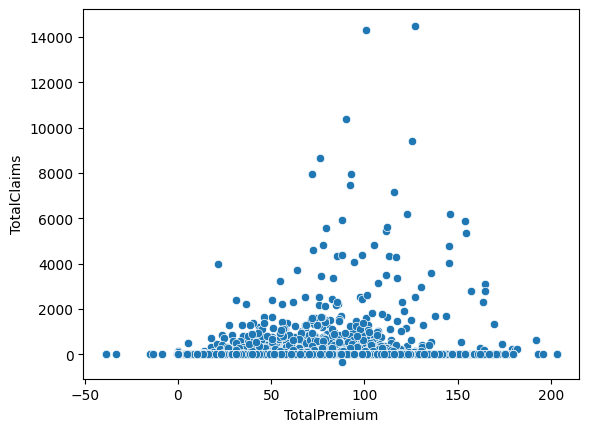

In [21]:
sns.scatterplot(x=grouped_data['TotalPremium'],y=grouped_data['TotalClaims'])


Outlier Detection:


In [22]:
from scripts.Eda import get_outlier_summary

In [23]:
get_outlier_summary(insurance_data)

From 14 selected numerical columns, there are 14 columns with outlier values.


,Variable,Number of Outliers
0,UnderwrittenCoverID,5717
1,PolicyID,31232
2,PostalCode,8149
3,mmcode,242064
4,RegistrationYear,7482
5,Cylinders,34814
6,cubiccapacity,56939
7,kilowatts,2175
8,NumberOfDoors,107260
9,CustomValueEstimate,220456


Box-plot before removing outliers

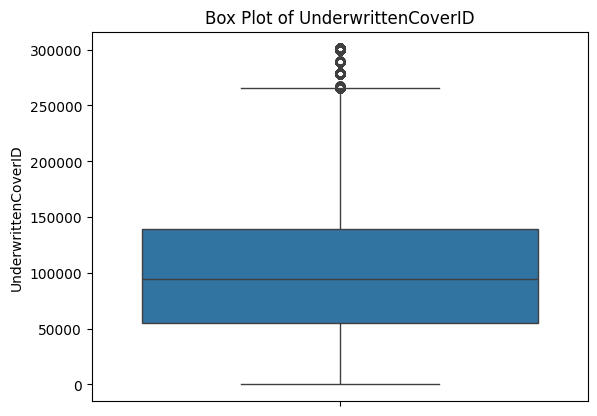

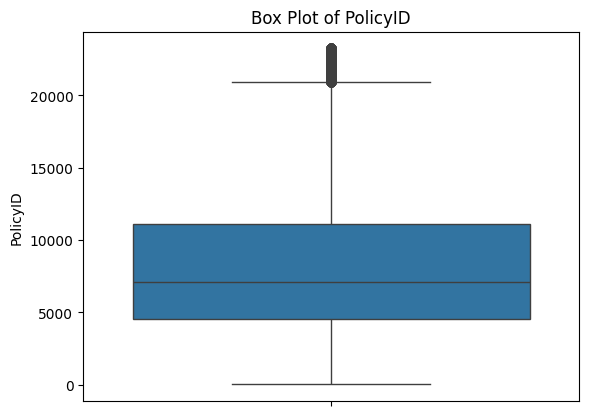

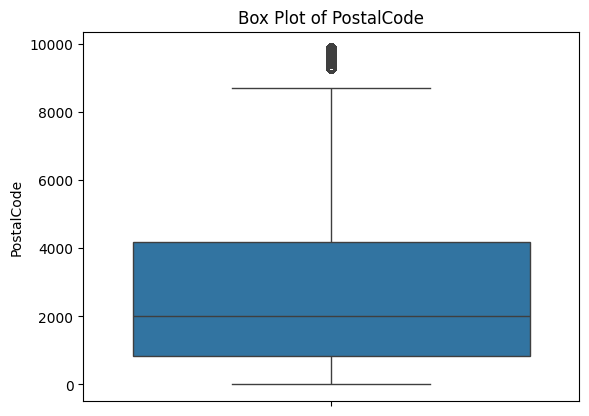

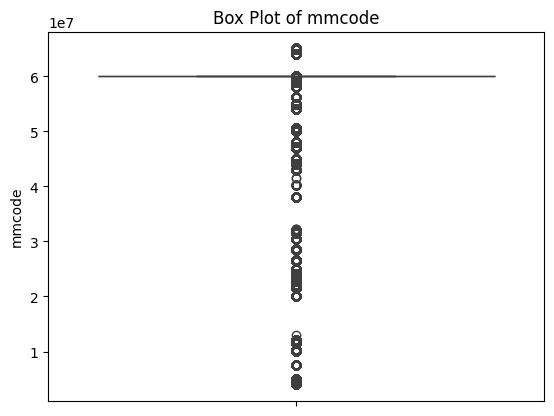

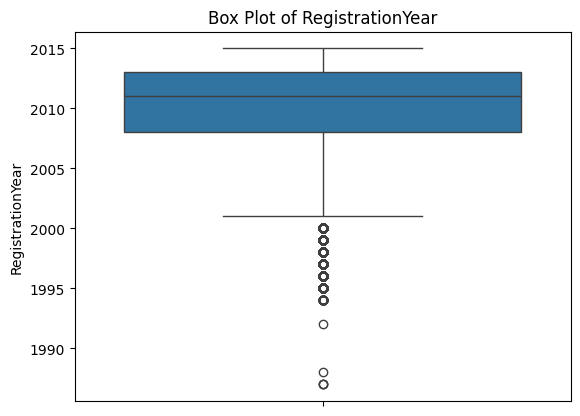

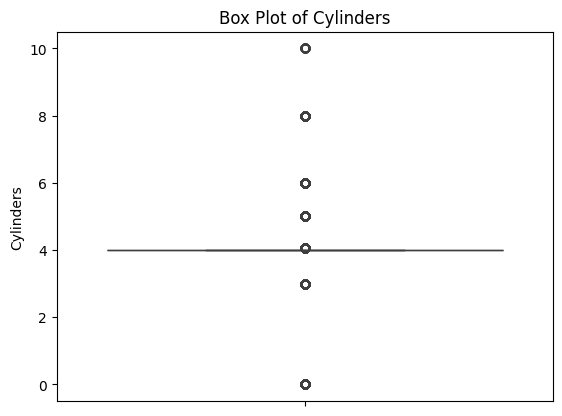

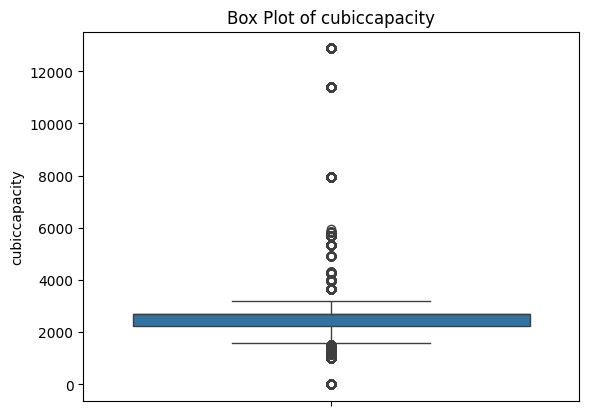

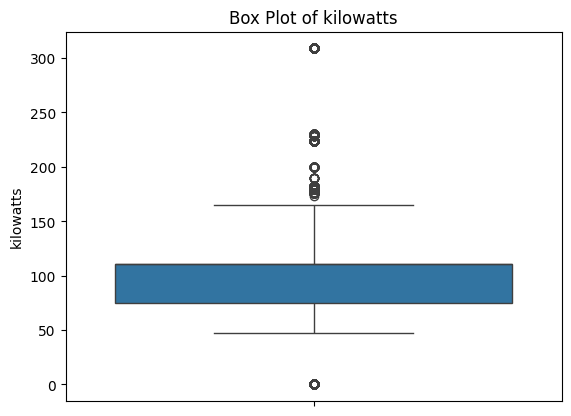

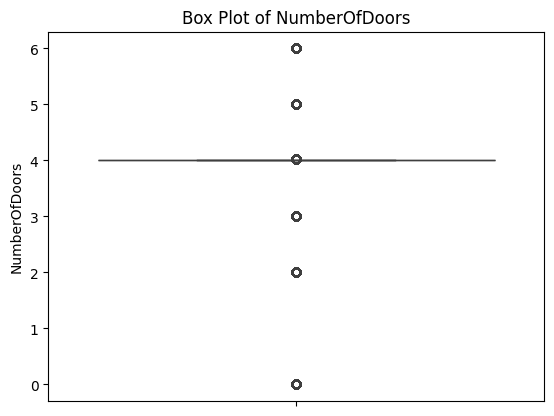

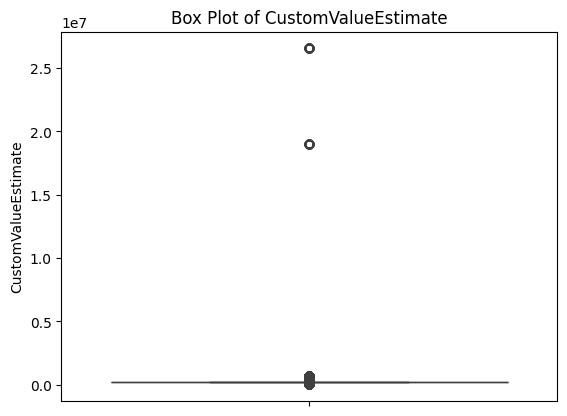

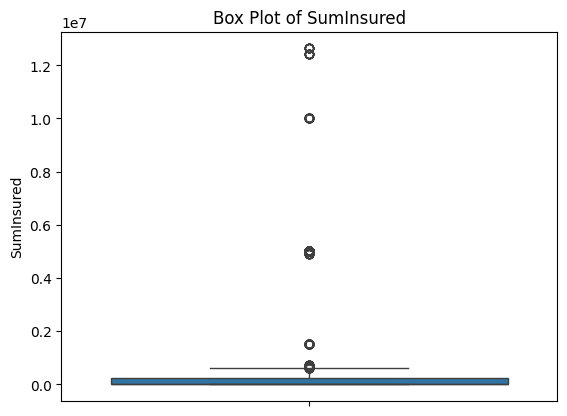

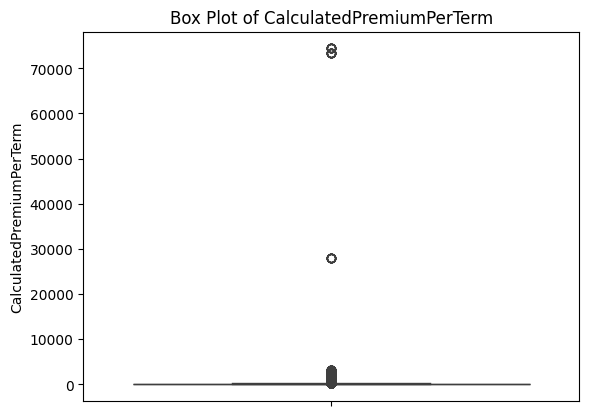

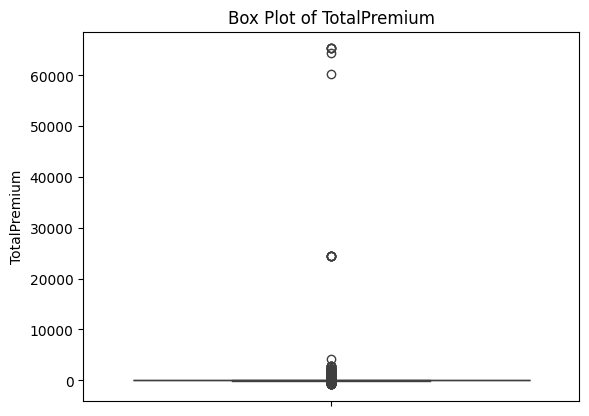

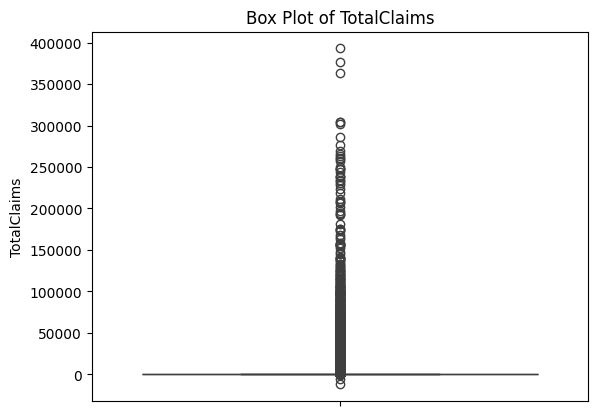

In [24]:
for column in insurance_data.select_dtypes(include='number').columns:
    sns.boxplot(data=insurance_data[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

Remove Outliers

In [25]:
from scripts.Eda import remove_outliers_winsorization


In [26]:
insurance_data=remove_outliers_winsorization(insurance_data)


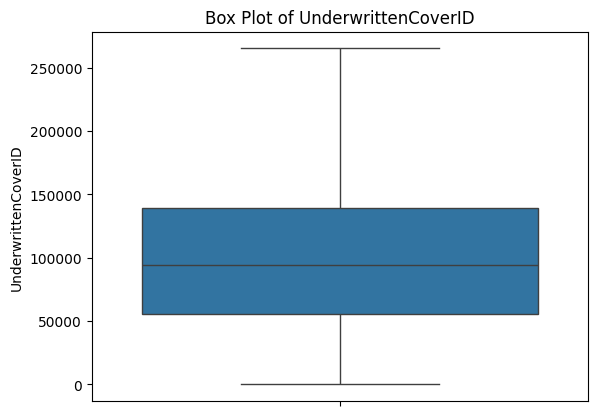

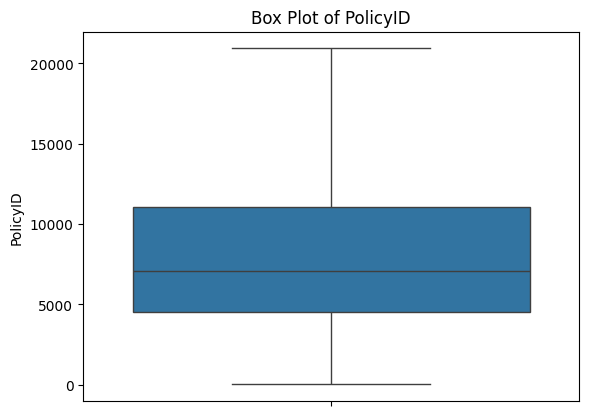

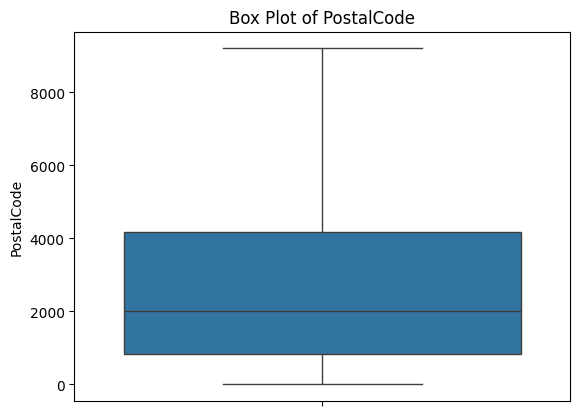

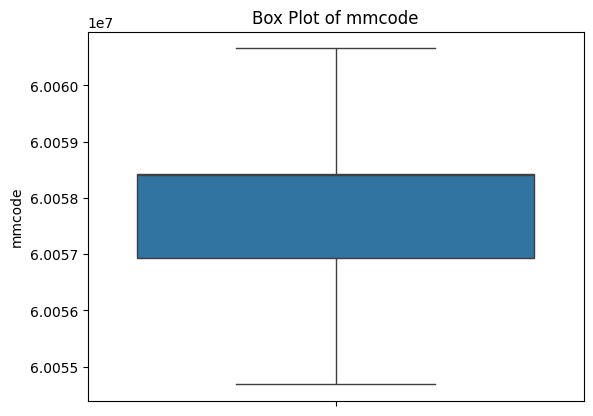

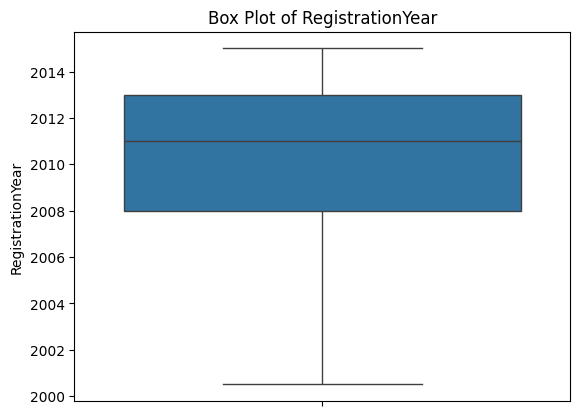

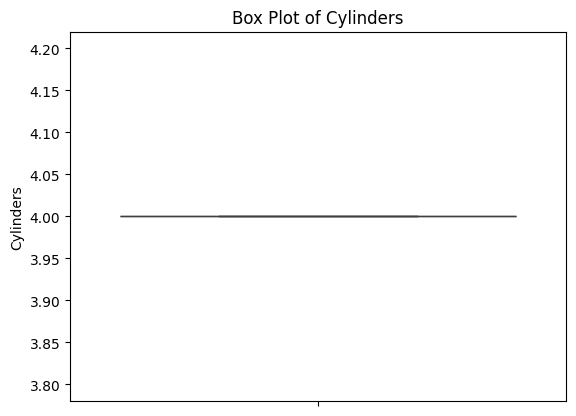

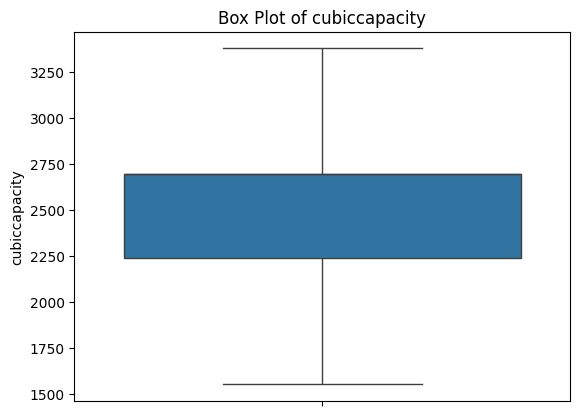

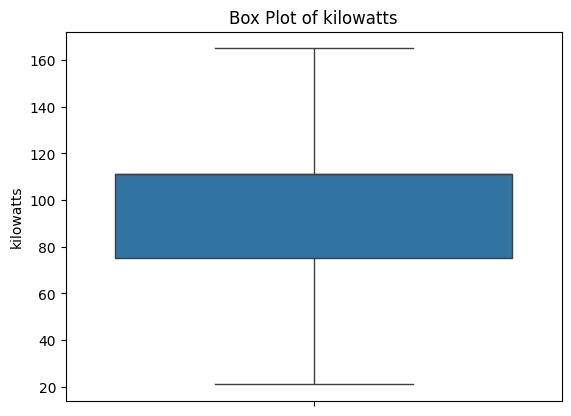

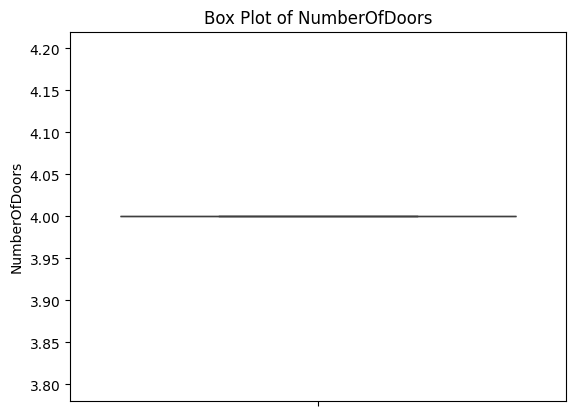

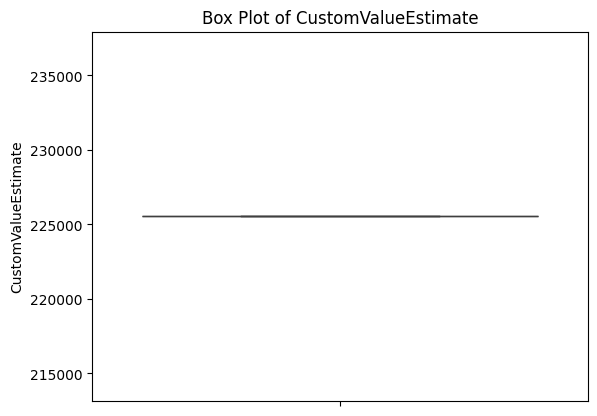

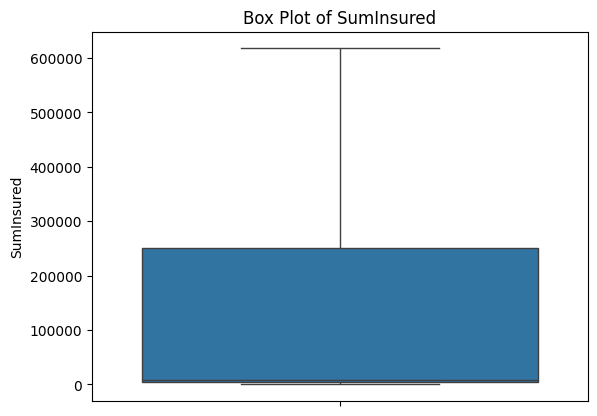

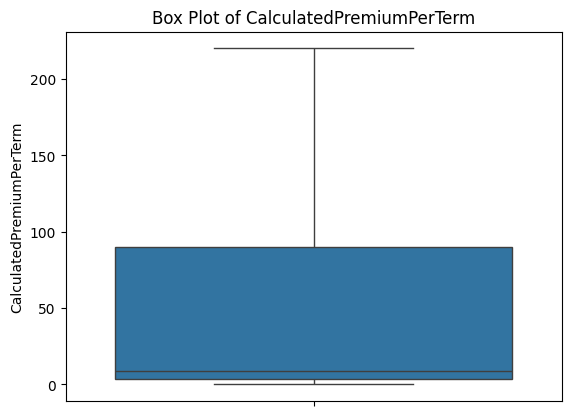

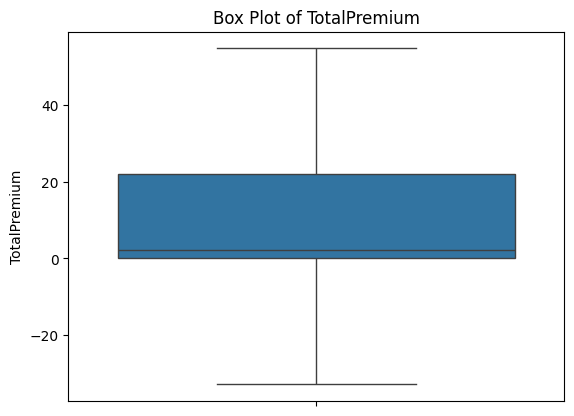

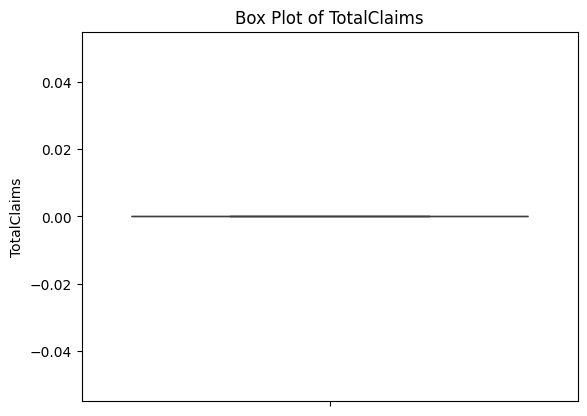

In [27]:
for column in insurance_data.select_dtypes(include='number').columns:
    sns.boxplot(data=insurance_data[column])
    plt.title(f"Box Plot of {column}")
    plt.show()


Data Comparison

Trends Over Geography

In [28]:
print(insurance_data.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')


In [29]:
def groupedDataTrendsOverGeography(columns):
    for column in columns:
      grouped_data_Trends_Over_Geography = insurance_data.groupby('Province')[[column]].mean().reset_index()
      plt.figure(figsize=(14, 6))
      sns.barplot(x='Province',y=column, data=grouped_data_Trends_Over_Geography)
      plt.show()

C:\Users\hanad\AppData\Local\Temp\ipykernel_24224\1568893249.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_Trends_Over_Geography = insurance_data.groupby('Province')[[column]].mean().reset_index()


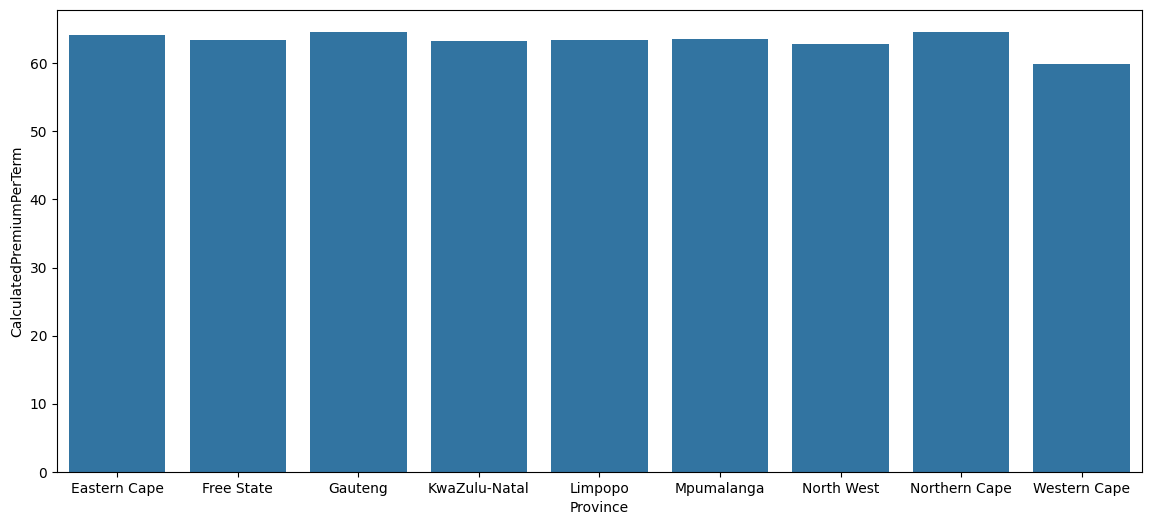

C:\Users\hanad\AppData\Local\Temp\ipykernel_24224\1568893249.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_Trends_Over_Geography = insurance_data.groupby('Province')[[column]].mean().reset_index()


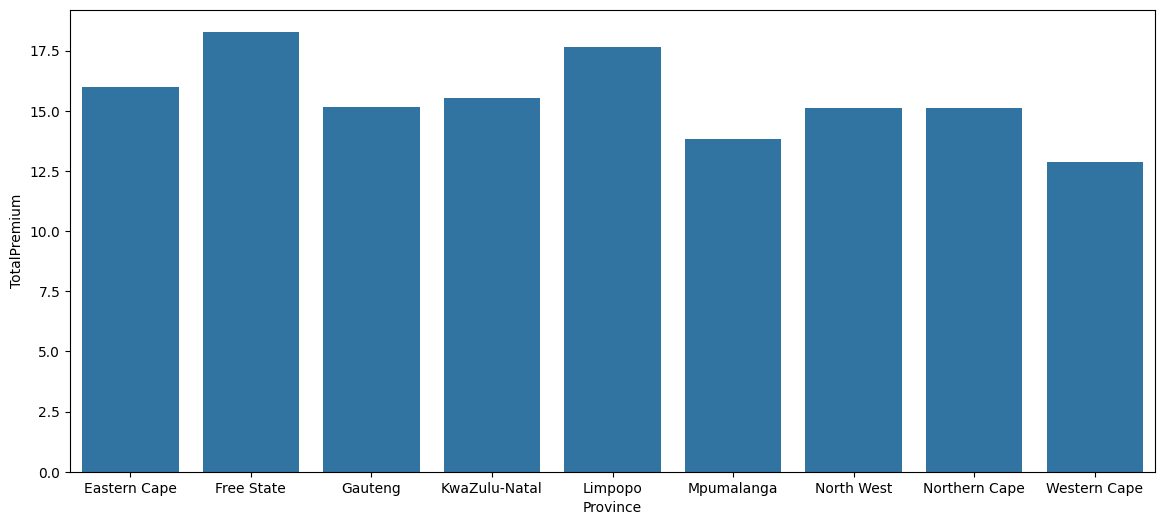

In [30]:
groupedDataTrendsOverGeography(['CalculatedPremiumPerTerm','TotalPremium'])

In [31]:
grouped_data_Trends_Over_Geography = insurance_data.groupby('Province')


C:\Users\hanad\AppData\Local\Temp\ipykernel_24224\3015764501.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_Trends_Over_Geography = insurance_data.groupby('Province')


In [32]:
x=grouped_data_Trends_Over_Geography['CoverType'].value_counts(normalize=True).unstack()
x.head()

CoverType,Accidental Death,Asset Value Preserver,Baggage/Luggage,Basic Excess Waiver,Cash Takings,Cleaning and Removal of Accident Debris,Credit Protection,Deposit Cover,Emergency Charges,Factory Fitted Sound and Other Electronic Equipment,...,Keys and Alarms,Own Damage,Passenger Liability,Roadside Assistance,Signage and Vehicle Wraps,Standalone passenger liability,Third Party,Third Party Only,Trailer,Windscreen
Province,,,,,,,,,,,,,,,,,,,,,
Eastern Cape,0.055808,0.000330,0.001121,0.073378,0.000000,0.099090,0.015394,0.002406,0.099090,0.000000,...,0.099090,0.099090,0.099090,0.000000,0.099090,0.000165,0.099090,0.001582,0.000791,0.098299
Free State,0.065070,0.000000,0.000000,0.067416,0.000000,0.097172,0.013458,0.001605,0.097172,0.000000,...,0.097172,0.097172,0.097172,0.001482,0.097172,0.000494,0.097172,0.000000,0.000000,0.097172
Gauteng,0.012822,0.001140,0.000262,0.068216,0.000058,0.100331,0.020388,0.000653,0.100336,0.000003,...,0.100367,0.104777,0.104759,0.003534,0.100336,0.000053,0.100707,0.000038,0.000000,0.104020
KwaZulu-Natal,0.052250,0.000436,0.000000,0.041047,0.000018,0.104493,0.014784,0.002427,0.104493,0.000006,...,0.104493,0.104499,0.104493,0.002215,0.104493,0.000560,0.104529,0.000000,0.000000,0.104423
Limpopo,0.043646,0.000000,0.000000,0.057296,0.000000,0.100419,0.020696,0.000282,0.100419,0.000000,...,0.100419,0.100419,0.100419,0.000523,0.100419,0.000000,0.100419,0.000000,0.000000,0.100419


<Axes: xlabel='Province'>

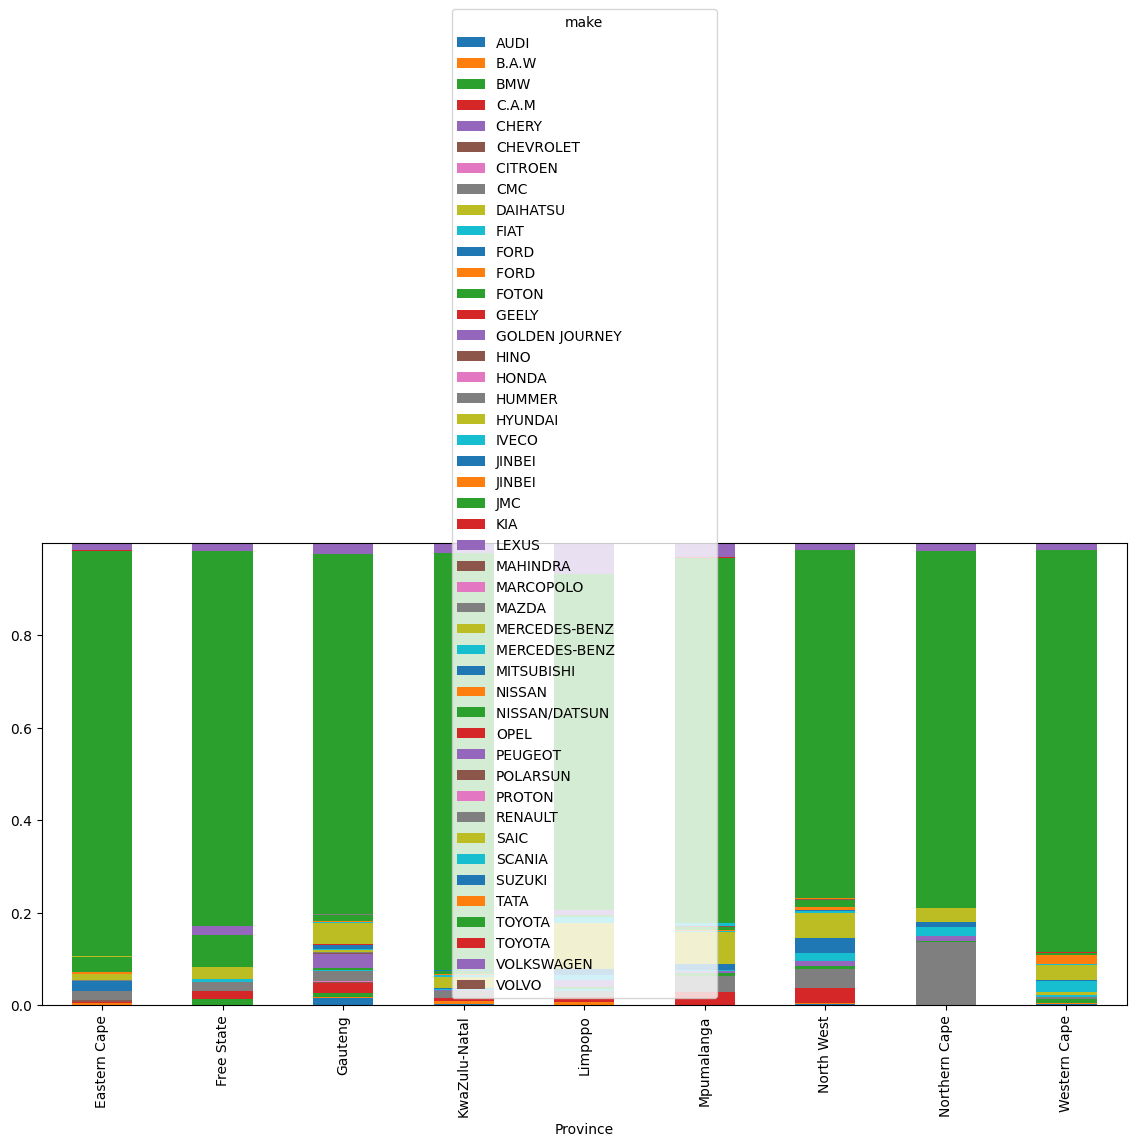

In [37]:
# Custom colors for categories
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
x.plot(kind='bar',stacked=True,figsize=(14,6))

<Axes: xlabel='Province'>

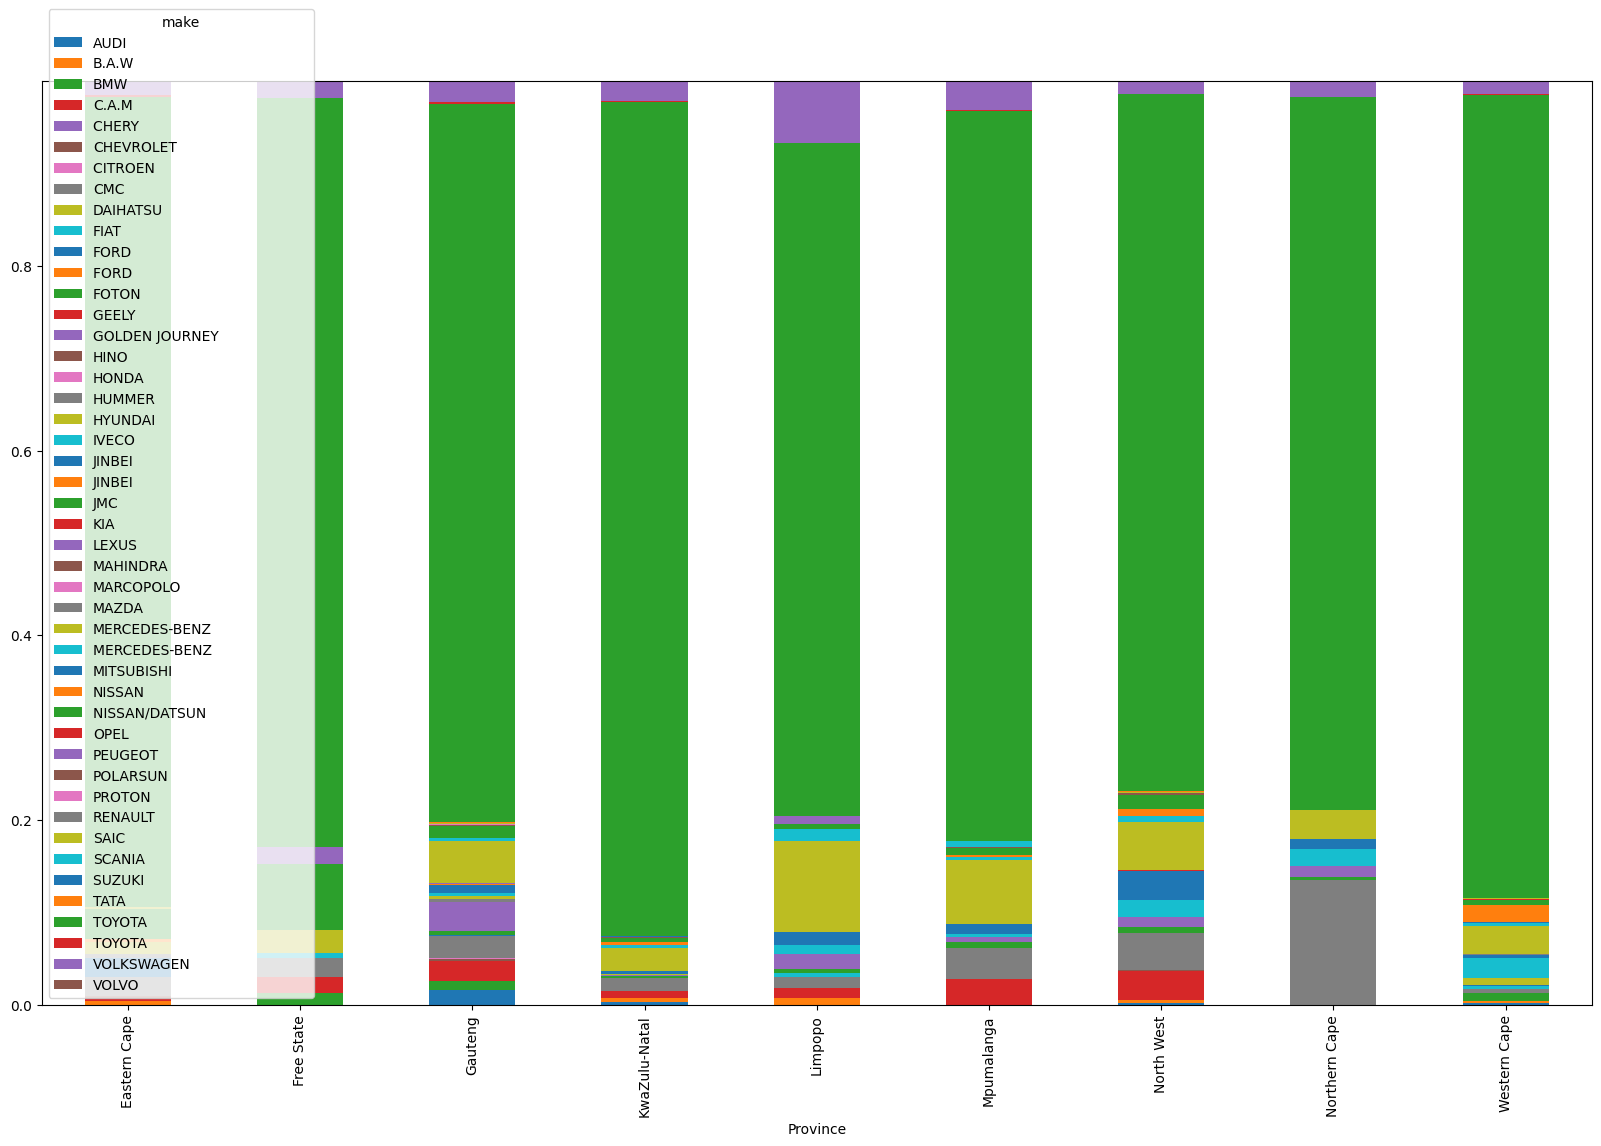

In [34]:
x=grouped_data_Trends_Over_Geography['make'].value_counts(normalize=True).unstack()
x.plot(kind='bar',stacked=True,figsize=(20,12))